## Загрузка библиотек и данных.

In [1]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats as st
from datetime import datetime, timedelta

pd.options.display.float_format = '{:.2f}'.format
pd.set_option('display.max_columns', None)

In [2]:
try:
    visits = pd.read_csv('D:\\Катя\\Яндекс практикум\\проект бизнес показатели\\visits_info_short.csv')
    orders = pd.read_csv('D:\\Катя\\Яндекс практикум\\проект бизнес показатели\\orders_info_short.csv')
    costs = pd.read_csv('D:\\Катя\\Яндекс практикум\\проект бизнес показатели\\costs_info_short.csv')
except:
    print('Error')

**Загражены необходимы библиотеки для проведения исследования. А также данные с информацией о визитах пользователей в приложение, о количестве приобретённого платного контента в приложении, о маркетинговых расходах.**

## Краткий обзор данных.

In [3]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [4]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [5]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


**При поверхностном ознакомлении с данными можно выявить следующее:**
    
- **отсутствуют пропуски в данных,**
- **следует привести названия колонок к единому стилевому оформлению,**
- **следует преобразовать столбцы с датами к типу datetime.**

## Предобработка данных.

In [6]:
visits.columns = [x.lower().replace(' ', '_') for x in visits.columns.values]
orders.columns = [x.lower().replace(' ', '_') for x in orders.columns.values]
costs.columns = [x.lower().replace(' ', '_') for x in costs.columns.values]

In [7]:
# Преобразование типов данных
visits['session_start'] = pd.to_datetime(visits['session_start'])
visits['session_end'] = pd.to_datetime(visits['session_end'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt'])

In [8]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype         
---  ------         --------------   -----         
 0   user_id        309901 non-null  int64         
 1   region         309901 non-null  object        
 2   device         309901 non-null  object        
 3   channel        309901 non-null  object        
 4   session_start  309901 non-null  datetime64[ns]
 5   session_end    309901 non-null  datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 14.2+ MB


In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   user_id   40212 non-null  int64         
 1   event_dt  40212 non-null  datetime64[ns]
 2   revenue   40212 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1)
memory usage: 942.6 KB


In [10]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   dt       1800 non-null   datetime64[ns]
 1   channel  1800 non-null   object        
 2   costs    1800 non-null   float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 42.3+ KB


**Проверка данных на наличие явных дубликатов.**

In [11]:
visits.duplicated().sum()

0

In [12]:
orders.duplicated().sum()

0

In [13]:
costs.duplicated().sum()

0

**Проведена преобработка данных - наименования столбцов оформлены в едином стиле, изменены необходимые типы данных (преобразование дат к типу datetime), осуществлена проверка данных на явные дубликаты (дубликаты отсутствуют).**

### Детальное изучение таблицы visits и поиск неявных дубликатов.

In [14]:
visits.head()

user_id         region   device  channel       session_start  \
0  981449118918  United States   iPhone  organic 2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic 2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic 2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop 2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic 2019-05-01 03:33:35   

          session_end  
0 2019-05-01 02:45:01  
1 2019-05-01 04:47:35  
2 2019-05-01 15:32:08  
3 2019-05-01 00:54:25  
4 2019-05-01 03:57:40

In [15]:
visits['region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [16]:
visits['device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [17]:
visits['channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

In [18]:
display(visits['session_start'].min())
visits['session_end'].min()

Timestamp('2019-05-01 00:00:41')

Timestamp('2019-05-01 00:07:06')

In [19]:
display(visits['session_start'].max())
visits['session_end'].max()

Timestamp('2019-10-31 23:59:23')

Timestamp('2019-11-01 01:38:46')

**Таблица visits хранит лог сервера с информацией о посещениях сайта.**

**В таблице представлены 4 региона - США, Великобритания, Франция, Германия; 4 устройства - iPhone, Mac, Android, PC; а также 11 источников перехода на сайт.**

**Более детальное изучение таблицы visits позволяет сделать вывод об отсутствии неявных дубликатов. Данные в таблице visits представлены с 01.05.2019 по 01.11.2019 года.**

### Детальное изучение таблицы orders и поиск неявных дубликатов.

In [20]:
orders.head()

user_id            event_dt  revenue
0  188246423999 2019-05-01 23:09:52     4.99
1  174361394180 2019-05-01 12:24:04     4.99
2  529610067795 2019-05-01 11:34:04     4.99
3  319939546352 2019-05-01 15:34:40     4.99
4  366000285810 2019-05-01 13:59:51     4.99

In [21]:
orders['revenue'].unique()

array([ 4.99,  5.99,  9.99, 49.99, 19.99])

In [22]:
orders['event_dt'].min()

Timestamp('2019-05-01 00:28:11')

In [23]:
orders['event_dt'].max()

Timestamp('2019-10-31 23:56:56')

**Таблица orders хранит информацию о заказах. Данные, представленные в таблице orders, не предполагают возможность наличия неявных дубликатов.**

**Данные в таблице orders представлены с 01.05.2019 по 31.10.2019 год. Суммы заказов составляют 4.99, 5.99, 9.99, 19.99 и 49.99 денежных единиц.**

### Детальное изучение таблицы costs и поиск неявных дубликатов.

In [24]:
costs.head()

dt   channel  costs
0 2019-05-01  FaceBoom 113.30
1 2019-05-02  FaceBoom  78.10
2 2019-05-03  FaceBoom  85.80
3 2019-05-04  FaceBoom 136.40
4 2019-05-05  FaceBoom 122.10

In [25]:
costs['channel'].unique()

array(['FaceBoom', 'MediaTornado', 'RocketSuperAds', 'TipTop', 'YRabbit',
       'AdNonSense', 'LeapBob', 'OppleCreativeMedia', 'WahooNetBanner',
       'lambdaMediaAds'], dtype=object)

In [26]:
costs['costs'].min()

0.8

In [27]:
costs['costs'].max()

630.0

In [28]:
costs['dt'].min()

Timestamp('2019-05-01 00:00:00')

In [29]:
costs['dt'].max()

Timestamp('2019-10-27 00:00:00')

**Таблица costs хранит информацию о расходах на рекламу. Более детальное изучение данной таблицы позволяет сделать вывод об отсутствии неявных дубликатов.**

**В столбце channel представлены 10 рекламных источников, которые совпадают с источниками перехода на сайт в таблице visits (за исключение органических пользователей).**

**Минимальные затраты на рекламу составили 0.8 денежных единиц, максимальные затраты на рекламу - 630. Данные в таблице costs представлены с 01.05.2019 по 27.10.2019 года.**

**Таким образом, произведён обзор данных и осуществлена необходимая предобработка данных. Данные готовы для проведения дальнейшего исследовательского анализа.**

## Функции для вычисления значений метрик.

### Создание профилей пользователей (get_profiles).

In [30]:
def get_profiles(sessions, orders, ad_costs):
    # Шаг 1. Передадим в функцию расчета профиля данные о рекламных затратах (фрейм ad_costs)
    
    # сортируем сессии по id пользователя и дате для того,чтобы работал first
    # находим первые значения для параметров пользователя - будем считать их основными 
    profiles = (sessions.sort_values(by = ['user_id', 'session_start'])           
                        .groupby('user_id').agg({'session_start' : 'first',       
                                                 'channel': 'first',
                                                 'device': 'first',
                                                 'region': 'first'})                                 
                        .rename(columns = {'session_start' : 'first_ts'})  
                        .reset_index()  # вернем все данные из индекса в колонки                                           
               )
    # определим дату первого посещеня 
    # и начало месяца первого посещения - они понадобятся нам при когортном анализе
    profiles['dt'] = profiles['first_ts'].dt.date   
    profiles['dt'] = pd.to_datetime(profiles['dt'])
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')     
    
    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())   
            
    # Шаг 2. К данным о рекламных затратах добавим количества привлеченных пользователей
    new_users = profiles.groupby(['dt', 'channel']).agg({'user_id': 'nunique'}).\
             rename(columns = {'user_id': 'unique_users'}).reset_index()
    ad_costs = ad_costs.merge(new_users, on = ['dt', 'channel'], how = 'left')
    
    # Шаг 3. Найдем среднюю стоимость привлечения пользователя
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']
    
    # Шаг 4. Присоединим данные к профилям пользователей информацию о средней стоимости привлечения в день 
    #привлечения пользователя из нужного источника
    profiles = profiles.merge(ad_costs[['dt', 'channel', 'acquisition_cost']], on = ['dt', 'channel'], how = 'left')
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0) # органические пользователи будут стоить 0
    
    return profiles

### Подсчёт коэффициента удержания - Retention Rate (get_retention).

In [31]:
def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Подсчёт конверсии (get_conversion).

In [32]:
def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

### Подсчёт LTV и ROI (get_ltv).

In [33]:
def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

### Функции для построения графиков.

#### Сглаживание данных (filter_data).

In [34]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Построение графика удержания Retention Rate (plot_retention).

In [35]:
def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show() 

#### Построение графика конверсии (plot_conversion).

In [36]:
def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Визуализация LTV и ROI (plot_ltv_roi).

In [37]:
def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

**Все необходимые функции заданы.**

## Исследовательский анализ данных.

### Составление профилей пользователей.

In [38]:
# Зададим новую переменную profiles для составления профилей
profiles = get_profiles(visits, orders, costs) 
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt      month  payer  acquisition_cost  
0      2019-05-07 2019-05-01   True              1.09  
1      2019-07-09 2019-07-01  False              1.11  
2      2019-10-01 2019-10-01  False              0.00  
3      2019-08-22 2019-08-01  False              0.99  
4      2019-10-02 2019-10-01  False              0.23  
...           ...        ...    ...               ...  
150003 2019-09-28 2019-09-01  False              3.50  
150004 2019-10-21 2019-10-01  False              0.00  
150005 2019-07-23 2019-07-01  False              2.60  
150006 2019-09-28 2019-09-01  False              0.21  
150007 2019-10-18 2019-10-01  False              0.00  

[150008 rows x 9 columns]

In [39]:
profiles['first_ts'].min()

Timestamp('2019-05-01 00:00:41')

In [40]:
profiles['first_ts'].max()

Timestamp('2019-10-27 23:59:04')

**Пользовательские профили составлены. Минимальная дата привлечения пользователей 01.05.2019г., максимальная дата привлечения пользователей 27.10.2019 года.**

### Доли распределения пользователей (в т.ч. платящих и неплатящих) по странам.

In [41]:
profiles['region'].unique()

array(['United States', 'France', 'Germany', 'UK'], dtype=object)

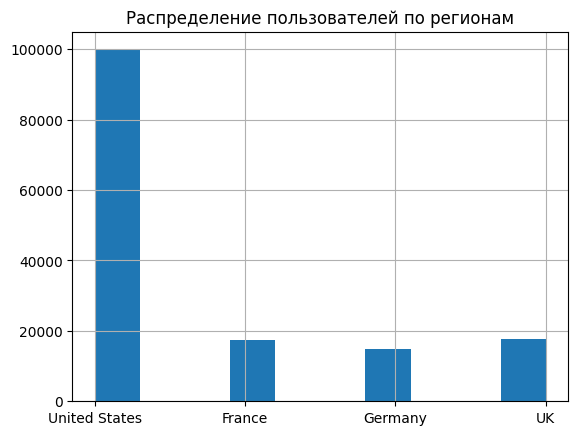

In [42]:
plt.title('Распределение пользователей по регионам')
profiles['region'].hist()
plt.show()

**Как уже было сказано выше, пользователи приходят в приложение из 4-х стран - США, Франция, Германия, Великобритания. Самая существенная часть пользователей (как платящих, так и неплатящих) приходится на США.**

**Определим, на какую страну приходится больше всего платящих пользователей.**

In [43]:
#Зададим функцию для построения таблиц по платящим пользователям в зависимости от фактора

def profiles_filtered (profiles, dimensions=[]):
    data_filtered = profiles.groupby(dimensions)[['user_id', 'payer']].agg({'user_id': 'count', 'payer':'sum'}). \
            sort_values(by='payer',ascending=False)
    data_filtered.columns = ['total_users', 'payers']
    data_filtered['%_of_payers'] = data_filtered['payers'] / data_filtered['total_users'] * 100
    return data_filtered

In [44]:
region_pay = profiles_filtered (profiles, dimensions=['region'])
region_pay

total_users  payers  %_of_payers
region                                         
United States       100002    6902         6.90
UK                   17575     700         3.98
France               17450     663         3.80
Germany              14981     616         4.11

In [45]:
6902 / region_pay.loc[:, 'payers'].sum() * 100

77.71647337011598

**Больше всего платящих пользователей также приходится на США - и по количеству, и в процентном отношении. Доля платящих пользователей из региона США составляет практически 7%, что в свою очередь составляет 77% от всех платящих пользователей по всем регионам.**

**Что касается Великобритании, Франции и Германии - количество платящих пользователей в этих регионах распределено достаточно равномерно. Можно считать, что на данные 3 региона приходится 23% от всех платящих пользователей (в среднем, по 7% на каждый регион).**

**Меньше всего пользователей привлекается из Германии (14,9 тысяч), однако доля платящих пользователей в данном регионе в процентном отношении немного опережает Францию и Великобританию (с 17 тысячами пользователей) - и составляет 4,11%.**

### Устройства. Распределение по долям среди пользователей. Предпочтения платящих пользователей.

In [46]:
profiles['device'].unique()

array(['Mac', 'iPhone', 'PC', 'Android'], dtype=object)

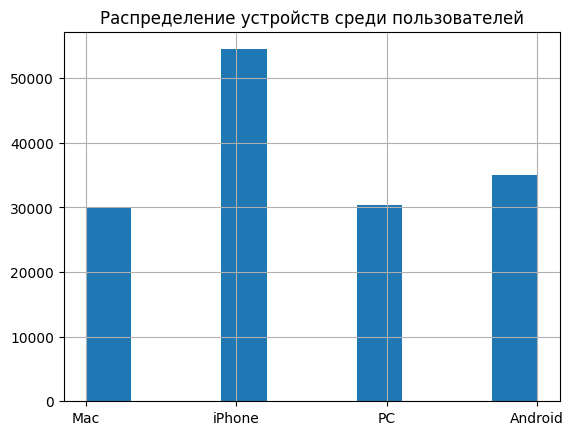

In [47]:
plt.title('Распределение устройств среди пользователей')
profiles['device'].hist()
plt.show()

**Как уже было сказано выше, устройства представлены 4-мя типами: iPhone, Android, Mac, PC. Выше представлена гистрограмма для типов устройств для всех пользователей (и платящих, и неплатящих). Основная доля приходится на iPhone.**

In [48]:
devices_pay = profiles_filtered (profiles, dimensions=['device'])
devices_pay

total_users  payers  %_of_payers
device                                   
iPhone         54479    3382         6.21
Android        35032    2050         5.85
Mac            30042    1912         6.36
PC             30455    1537         5.05

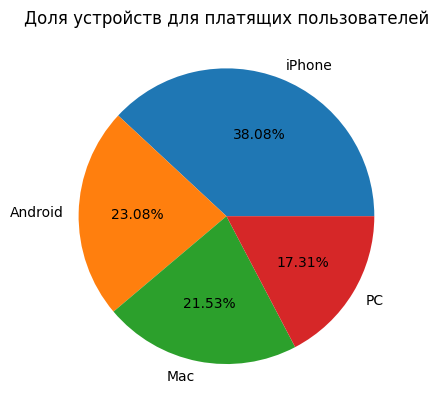

In [49]:
devices_pay['payers'].plot(kind='pie', autopct = '%.2f%%', title ='Доля устройств для платящих пользователей')
plt.ylabel(None)
plt.show()

**Среди платящих пользователей основная доля (38%) также приходится на владельцев iPhone, на втором месте (23%) владельцы Android, далее с 21,5% владельцы Mac, и на последнем месте с 17,3% - устройства PC.**

### Наиболее эффективные рекламные источники. 

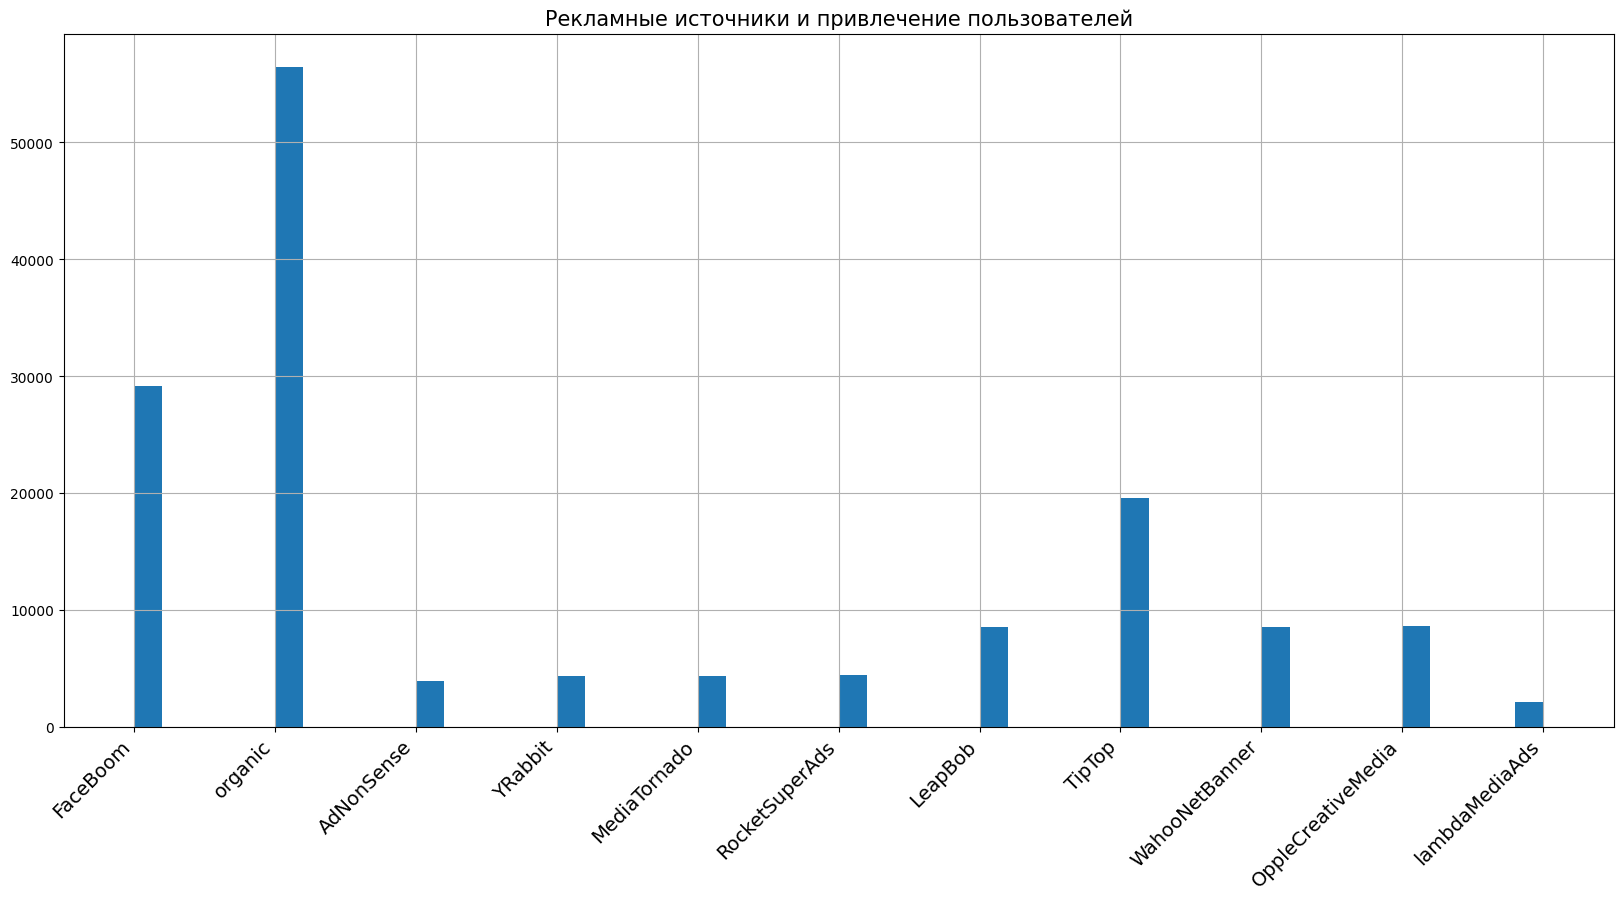

In [50]:
plt.title('Рекламные источники и привлечение пользователей', fontsize=15)
profiles['channel'].hist(bins=50, figsize=(20,9))
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.show()

**Основной источник привлечения пользователей (и платящих, и неплатящих) - органический трафик. На втором месте источник FaceBoom, на третьем TipTop, остальные источники распределены, в целом равномерно.**

In [51]:
channel_pay = profiles_filtered (profiles, dimensions=['channel'])
channel_pay

total_users  payers  %_of_payers
channel                                             
FaceBoom                  29144    3557        12.20
TipTop                    19561    1878         9.60
organic                   56439    1160         2.06
WahooNetBanner             8553     453         5.30
AdNonSense                 3880     440        11.34
RocketSuperAds             4448     352         7.91
LeapBob                    8553     262         3.06
OppleCreativeMedia         8605     233         2.71
lambdaMediaAds             2149     225        10.47
YRabbit                    4312     165         3.83
MediaTornado               4364     156         3.57

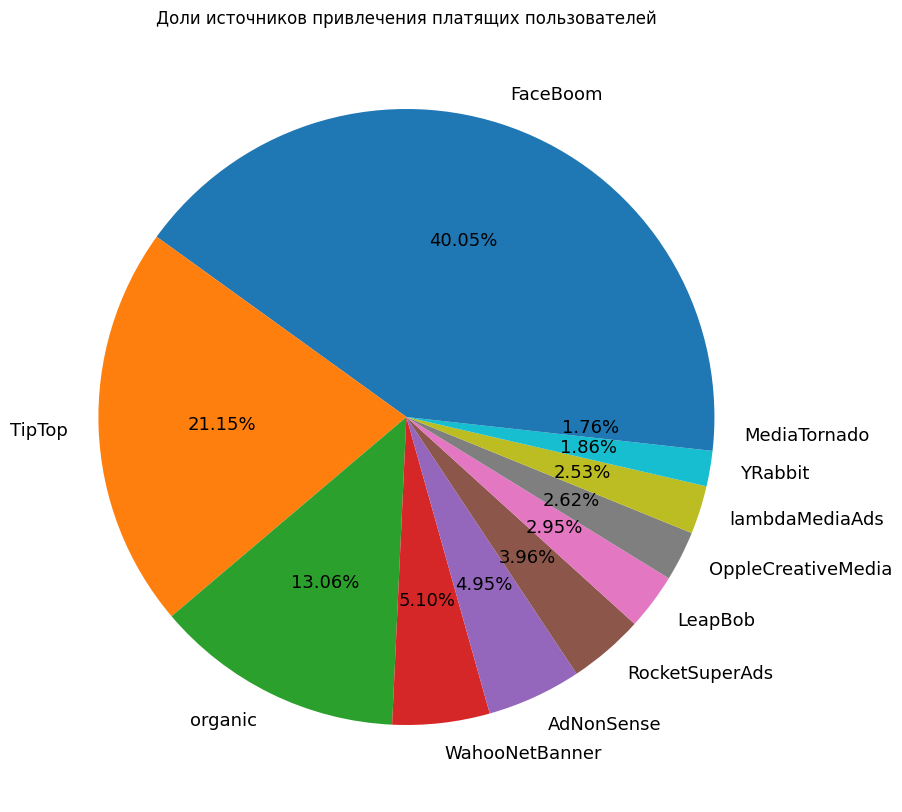

In [52]:
plt.figure(figsize=(16, 10))
channel_pay['payers'].plot(kind='pie', autopct = '%.2f%%', title ='Доли источников привлечения платящих пользователей',\
                           fontsize=13)
plt.ylabel(None)
plt.show()

**Наибольную эффективность показали следующие источники (ТОП-5): FaceBoom (12,2% пользователей из данного источника конвертируются в платящих), AdNonSense (11,3% пользователей из данного источника конвертируются в платящих), lambdaMediaAds	(10,4% конвертируемых пользователей), TipTop (9.6%) и RocketSuperAds с 7,91%. У остальных источников доля конвертируемых пользователей в платящих составляет 5% и менее.**

**Однако, источники привлечения пользователей различаются по популярности среди пользователей. И некоторые источники, показавшие свою эффективность по проценту конвертируемых пользователей в платящих, уступают более массовым источникам привлечения с меньшим процентом успешной конвертации пользователей.**

**Так, первое место в общей доле всех платящих пользователей приходится на FaceBoom (40%), второе место - TipTop (21%), третье место - "бесплатные" органические пользователи с 13%. Итого, ТОП-3 источников занимают 74% в доле всех платящих пользователей. На все остальные источники приходится доля 5% и менее.**

**Промежуточные итоги, полученные в ходе изучения характеристик и предпочтений платящих пользователей:**

1. **Больше всего платящих пользователей приходится на США - и по количеству, и в процентном отношении. Доля платящих пользователей из региона США составляет 6,9%, что в свою очередь = 77,7% от всех платящих пользователей по всем регионам. Т.е., пользователи из США являются основным потребителем товара.**  
    
   **Касательно остальных регионов (в которых представлено мобильное приложение) - Великобритания, Франция и Германия - количество платящих пользователей в этих регионах распределено достаточно равномерно. Можно считать, что на данные 3 региона приходится 23% от всех платящих пользователей (в среднем, по 7% на каждый регион).**
   
   **Меньше всего пользователей привлекается из Германии (14,9 тысяч), однако доля платящих пользователей в данном регионе в процентном отношении немного опережает Великобританию и Францию (с 17 тысячами пользователей) - и составляет 4,11% против ~3,9% соответсвенно.**
   
   
2. **Предпочения в устройствах среди платящих пользователей определяются так: основная доля (38%) приходится на владельцев iPhone, на втором месте (23%) владельцы Android, далее с 21,5% владельцы Mac, и на последнем месте с 17,3% - устройства PC. Т.е. 61% платящих пользователей использую приложение со смартфонов.**


3. **В ходе анализа рекламных источников был выделен ТОП-5 источников по эффективности привлечения платящих пользователей:**

- ***FaceBoom (12,2% пользователей из данного источника конвертируются в платящих),***
- ***AdNonSense (11,3% пользователей из данного источника конвертируются в платящих),***
- ***lambdaMediaAds	(10,4% конвертируемых пользователей),***
- ***TipTop (9.6%),***
- ***RocketSuperAds с 7,91%.*** 
- ***у остальных источников доля конвертируемых пользователей в платящих составляет 5% и менее.***

**Однако, источники привлечения пользователей различаются по популярности среди пользователей. И некоторые источники, показавшие свою эффективность по проценту конвертируемых пользователей в платящих, уступают более массовым источникам привлечения с меньшим процентом успешной конвертации пользователей. Так, первое место в общей доле всех платящих пользователей приходится на**

- ***FaceBoom (40%),***
- ***второе место - TipTop (21%),***
- ***третье место - "бесплатные" органические пользователи с 13%.***

**Итого, ТОП-3 источников занимают 74% в доле ВСЕХ платящих пользователей. На все остальные источники приходятся доли по 5% и менее.**
    
    
**Таким образом, "типичный профиль" платящего пользователя можно описать как житель США с устройством iPhone, узнавший о приложении через рекламный источник FaceBoom.**

## Маркетинг.

### Подсчёт общей суммы расходов на маркетинг.

In [53]:
costs

dt         channel  costs
0    2019-05-01        FaceBoom 113.30
1    2019-05-02        FaceBoom  78.10
2    2019-05-03        FaceBoom  85.80
3    2019-05-04        FaceBoom 136.40
4    2019-05-05        FaceBoom 122.10
...         ...             ...    ...
1795 2019-10-23  lambdaMediaAds   4.00
1796 2019-10-24  lambdaMediaAds   6.40
1797 2019-10-25  lambdaMediaAds   8.80
1798 2019-10-26  lambdaMediaAds   8.80
1799 2019-10-27  lambdaMediaAds  12.00

[1800 rows x 3 columns]

In [54]:
costs['costs'].sum()

105497.30000000002

**Общие расходы на маркетинг составили 105497 денежных единиц.**

### Распределение трат по рекламным источникам.

In [55]:
costs_channel = costs.groupby('channel')[['costs']].agg({'costs':'sum'}).sort_values(by='costs', ascending=False)
costs_channel

costs
channel                    
TipTop             54751.30
FaceBoom           32445.60
WahooNetBanner      5151.00
AdNonSense          3911.25
OppleCreativeMedia  2151.25
RocketSuperAds      1833.00
LeapBob             1797.60
lambdaMediaAds      1557.60
MediaTornado         954.48
YRabbit              944.22

In [56]:
costs_channel['costs'].sum() - 54751.30 - 32445.60

18300.40000000003

**Самые существенные расходы приходятся на источник TipTop - 54,7 тыс.ден.единиц. На втором месте FaceBoom с расходами 32,4 тыс.ден.единиц. На все остальные источники привлечения пользователей было потрачено 18,3 тыс.ден.единиц (по 5 тыс.ден.единиц и менее на каждый источник).**

### Визуализация динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику.

In [57]:
costs_new = costs.copy()

In [58]:
costs_new['week'] = costs_new['dt'].astype('datetime64[W]')
costs_new['month'] = costs_new['dt'].astype('datetime64[M]')
costs_new

dt         channel  costs       week      month
0    2019-05-01        FaceBoom 113.30 2019-04-25 2019-05-01
1    2019-05-02        FaceBoom  78.10 2019-05-02 2019-05-01
2    2019-05-03        FaceBoom  85.80 2019-05-02 2019-05-01
3    2019-05-04        FaceBoom 136.40 2019-05-02 2019-05-01
4    2019-05-05        FaceBoom 122.10 2019-05-02 2019-05-01
...         ...             ...    ...        ...        ...
1795 2019-10-23  lambdaMediaAds   4.00 2019-10-17 2019-10-01
1796 2019-10-24  lambdaMediaAds   6.40 2019-10-24 2019-10-01
1797 2019-10-25  lambdaMediaAds   8.80 2019-10-24 2019-10-01
1798 2019-10-26  lambdaMediaAds   8.80 2019-10-24 2019-10-01
1799 2019-10-27  lambdaMediaAds  12.00 2019-10-24 2019-10-01

[1800 rows x 5 columns]

In [59]:
#Формируем сводную таблицу для недель
costs_new_pivot_w = costs_new.pivot_table(index=['week'], columns=['channel'], values='costs', aggfunc='sum')
costs_new_pivot_w

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
week                                                                          
2019-04-25       40.95    113.30     2.52          6.24                4.25   
2019-05-02      281.40    742.50    27.09         57.60               34.75   
2019-05-09      259.35    728.20    29.61         59.76               31.00   
2019-05-16      275.10    760.10    28.98         58.80               31.00   
2019-05-23      277.20    788.70    30.45         46.56               44.00   
2019-05-30      136.50   1285.90    78.54         28.80               92.50   
2019-06-06       93.45   1014.20    57.96         27.84               70.75   
2019-06-13       96.60   1107.70    52.08         29.76               74.50   
2019-06-20      155.40   1502.60    86.73         37.20               90.25   
2019-06-27      148.05   1651.10    96.18         44.16              110.00   
2019-07-04      115.50   1371.70    78.96         35.28               93.75   
2019-07-11      103.95    994.40    61.32         29.04               71.50   
2019-07-18      110.25   1008.70    60.27         24.00               72.75   
2019-07-25      118.65   1250.70    77.70         30.00               85.25   
2019-08-01      141.75   1436.60    85.47         32.88               96.25   
2019-08-08      122.85   1267.20    81.48         33.60              105.50   
2019-08-15      123.90   1518.00    81.90         38.88               94.25   
2019-08-22      135.45   1430.00    87.36         37.44              106.00   
2019-08-29      113.40   1337.60    74.97         27.84               82.25   
2019-09-05      106.05   1127.50    64.89         27.36               76.75   
2019-09-12      109.20   1207.80    64.68         27.12               82.50   
2019-09-19      162.75   1674.20    95.13         38.88              120.00   
2019-09-26      180.60   1908.50   102.27         48.00              135.50   
2019-10-03      154.35   1566.40    91.98         37.68              106.00   
2019-10-10      121.80   1299.10    69.72         36.96               83.75   
2019-10-17      122.85   1369.50    74.76         30.24               95.25   
2019-10-24      103.95    983.40    54.60         22.56               61.00   

channel     RocketSuperAds  TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
week                                                                         
2019-04-25           21.06   80.00           10.80     8.10           17.60  
2019-05-02          136.89  479.00           73.80    76.50          105.60  
2019-05-09          131.62  451.00           93.00    74.10           98.40  
2019-05-16          142.16  572.60           85.80    66.60          101.60  
2019-05-23          122.85  993.70           95.40    60.00          116.00  
2019-05-30           78.39 1432.60          211.20    39.90           56.80  
2019-06-06           73.71 1138.10          181.80    18.60           36.80  
2019-06-13           64.35 1229.30          169.80    19.80           36.80  
2019-06-20           88.98 1884.10          243.00    25.56           54.40  
2019-06-27           76.89 2431.00          289.20    30.06           56.80  
2019-07-04           67.34 2054.00          219.60    22.68           56.80  
2019-07-11           45.95 1671.80          165.00    17.28           38.40  
2019-07-18           50.51 1565.20          156.60    19.08           47.20  
2019-07-25           55.05 2084.40          196.20    25.02           53.60  
2019-08-01           70.07 2469.00          219.60    28.35           43.20  
2019-08-08           59.60 2514.00          240.00    26.04           41.60  
2019-08-15           55.51 2556.00          230.40    29.61           65.60  
2019-08-22           48.43 2586.00          247.80    30.66           44.80  
2019-08-29           44.20 2458.50          206.40    24.39           53.60  
2019-09-05           38.02 2506.00          184.80    26.40           

In [60]:
#Формируем сводную таблицу по месяцам
costs_new_pivot_m = costs_new.pivot_table(index=['month'], columns=['channel'], values='costs', aggfunc='sum')
costs_new_pivot_m

channel     AdNonSense  FaceBoom  LeapBob  MediaTornado  OppleCreativeMedia  \
month                                                                         
2019-05-01     1169.70   3524.40   140.28        238.56              169.75   
2019-06-01      538.65   5501.10   314.58        138.00              370.00   
2019-07-01      504.00   5294.30   313.53        138.48              366.50   
2019-08-01      579.60   6274.40   369.81        154.56              439.25   
2019-09-01      581.70   6114.90   343.98        144.72              427.75   
2019-10-01      537.60   5736.50   315.42        140.16              378.00   

channel     RocketSuperAds   TipTop  WahooNetBanner  YRabbit  lambdaMediaAds  
month                                                                         
2019-05-01          577.98  2981.00          418.80   299.70          458.40  
2019-06-01          325.72  6675.60          921.00   106.20          199.20  
2019-07-01          252.07  8410.20          851.40    97.38          219.20  
2019-08-01          253.11 11202.00         1040.40   124.74          220.00  
2019-09-01          218.40 13232.50          977.40   152.79          247.20  
2019-10-01          205.73 12250.00          942.00   163.41          213.60

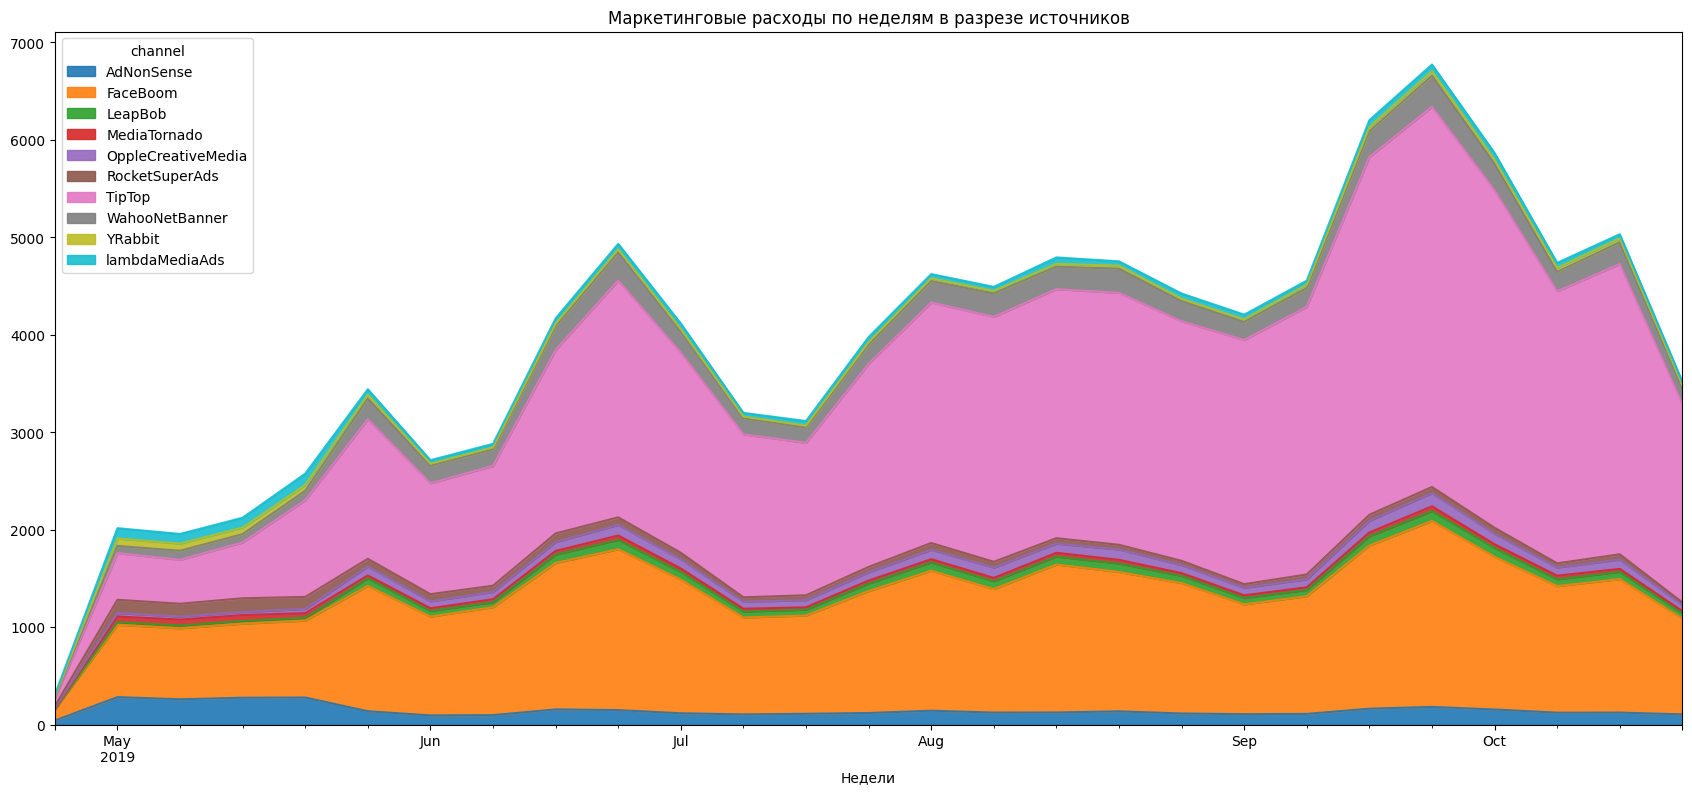

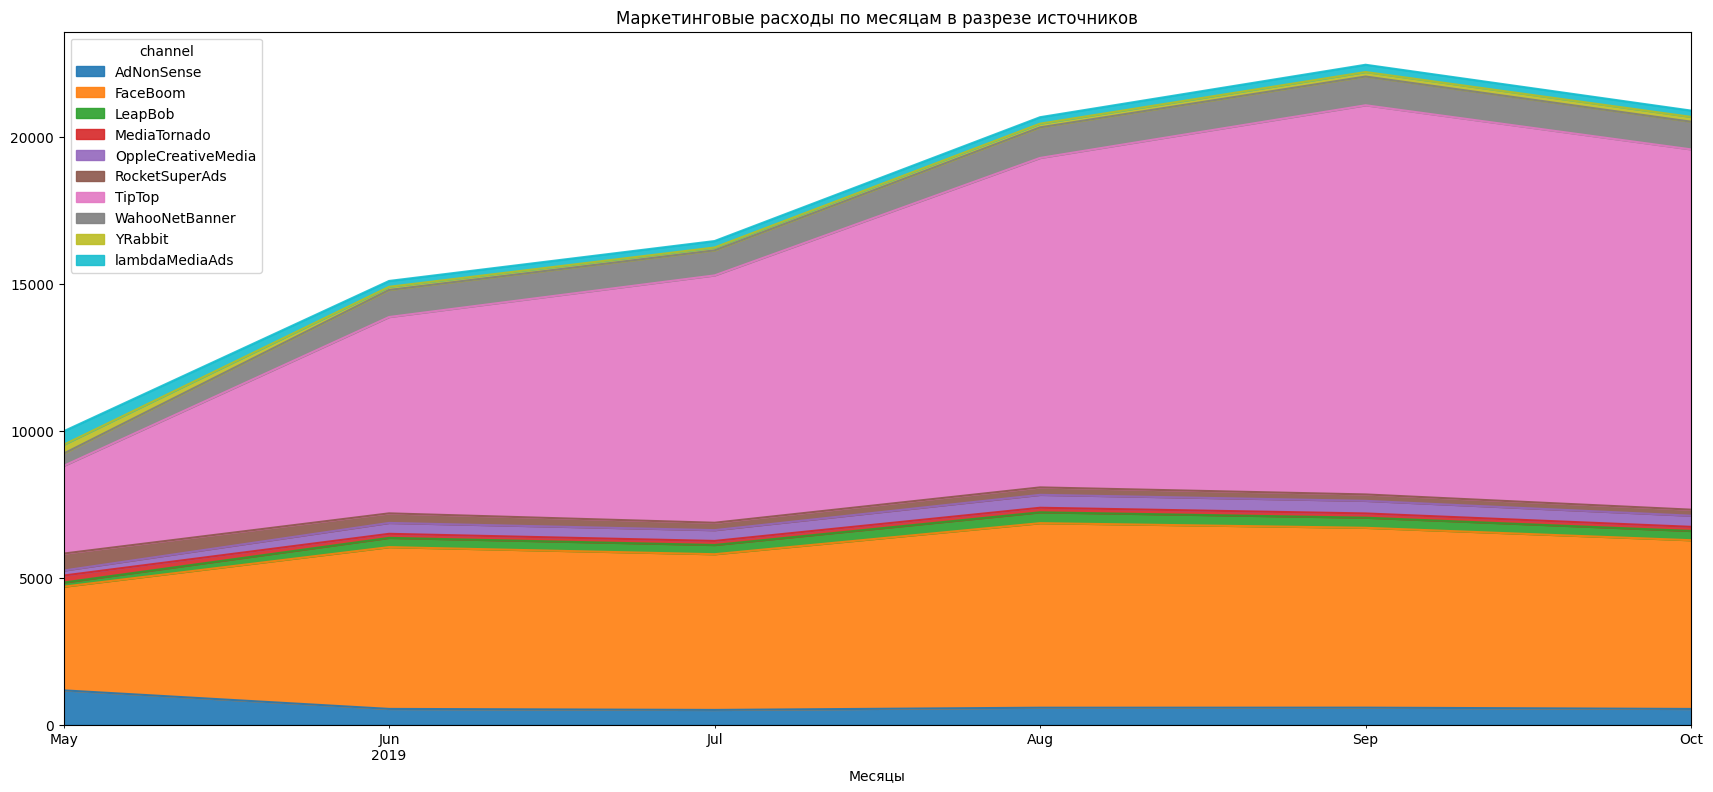

In [61]:
costs_new_pivot_w.plot.area(figsize=(21, 9), title='Маркетинговые расходы по неделям в разрезе источников', xlabel = 'Недели',\
                            alpha=0.9)
costs_new_pivot_m.plot.area(figsize=(21, 9), title='Маркетинговые расходы по месяцам в разрезе источников', xlabel = 'Месяцы', \
                            alpha=0.9)
plt.show()

**Графики (в разрезе и недель, и по месяцам) показывают существенное увеличение рекламы в источнике TipTop. Данный источник вымещает в процентном отношении другие источники, которые в свою очередь показывают стабильность и наличие незначительной динамики только в понедельном анализе.**

### Средняя стоимость привлечения одного пользователя CAC из каждого источника.

In [62]:
profiles

user_id            first_ts       channel  device         region  \
0             599326 2019-05-07 20:58:57      FaceBoom     Mac  United States   
1            4919697 2019-07-09 12:46:07      FaceBoom  iPhone  United States   
2            6085896 2019-10-01 09:58:33       organic  iPhone         France   
3           22593348 2019-08-22 21:35:48    AdNonSense      PC        Germany   
4           31989216 2019-10-02 00:07:44       YRabbit  iPhone  United States   
...              ...                 ...           ...     ...            ...   
150003  999956196527 2019-09-28 08:33:02        TipTop  iPhone  United States   
150004  999975439887 2019-10-21 00:35:17       organic      PC             UK   
150005  999976332130 2019-07-23 02:57:06        TipTop  iPhone  United States   
150006  999979924135 2019-09-28 21:28:09  MediaTornado      PC  United States   
150007  999999563947 2019-10-18 19:57:25       organic  iPhone  United States   

               dt      month  payer  acquisition_cost  
0      2019-05-07 2019-05-01   True              1.09  
1      2019-07-09 2019-07-01  False              1.11  
2      2019-10-01 2019-10-01  False              0.00  
3      2019-08-22 2019-08-01  False              0.99  
4      2019-10-02 2019-10-01  False              0.23  
...           ...        ...    ...               ...  
150003 2019-09-28 2019-09-01  False              3.50  
150004 2019-10-21 2019-10-01  False              0.00  
150005 2019-07-23 2019-07-01  False              2.60  
150006 2019-09-28 2019-09-01  False              0.21  
150007 2019-10-18 2019-10-01  False              0.00  

[150008 rows x 9 columns]

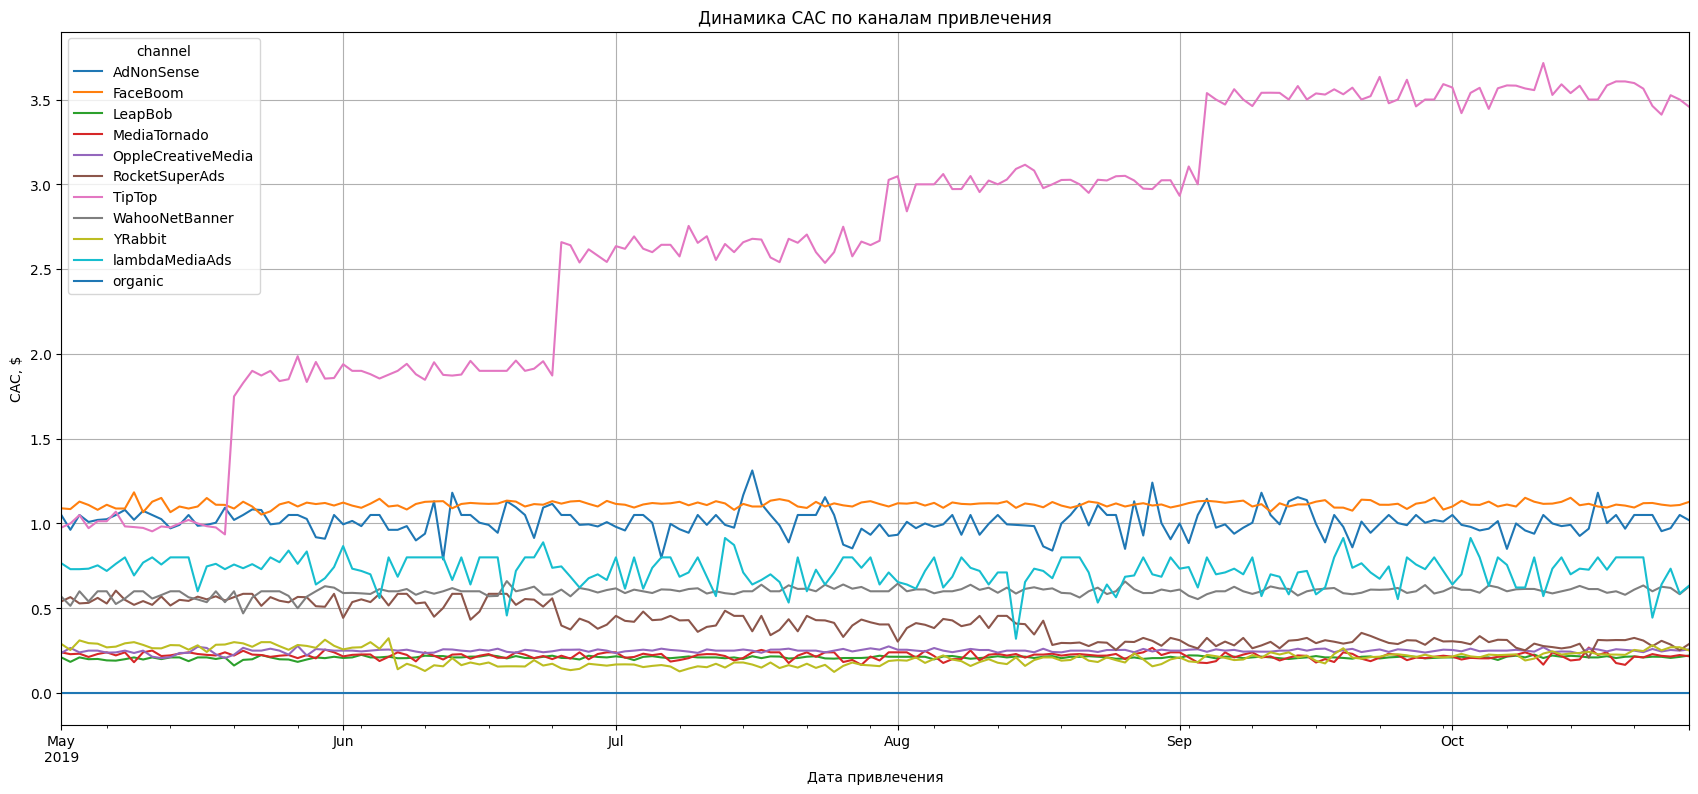

In [63]:
profiles.pivot_table(
    index='dt', columns='channel', values='acquisition_cost', aggfunc='mean'
).plot(grid=True, figsize=(21, 9))
plt.ylabel('CAC, $')
plt.xlabel('Дата привлечения')
plt.title('Динамика САС по каналам привлечения')
plt.show()

**В основном, средняя стоимость привлечения одного пользователя варьируется от 0,25 до 1,1 ден.ед., органические пользователи - "бесплатные". На минимальной границе со стоимостью ~0,25 ден.ед. находятся такие источники, как YRabbit, OppleCreativeMedia	, MediaTornado, LeapBob. На верхней границе стоимости ~1,1 ден.ед. находятся такие источники, как FaceBoom и AdNonSense.**

**Аномальные значения показывает один источник - TipTop. Изначально, стоимость привлечения одного пользователя в TipTop также соответствовала ~1 ден.единице, однако, с середины мая 2019г. стоимость резко увеличилась до ~1.8 денежных единиц. Похожие резкие скачки увеличения CAC наблюдались в конце июня и в начале сентября 2019г. В итоге, на конец октября 2019г. средняя стоимость привлечения одного пользователя в TipTop составила 3,5 ден.единицы, что превышает расходы по другим источникам более, чем в 3 раза.**

**Промежуточные итоги, полученные в ходе изучения маркетинговой политики:**
    
1. **Общие расходы на маркетинг составили 105497 денежных единиц, из которых самые существенные расходы приходятся на источник:**
    
    - ***TipTop - 54,7 тыс.ден.единиц.,***
    - ***FaceBoom с расходами 32,4 тыс.ден.единиц.,***
    - ***на все остальные 8 источников привлечения пользователей было потрачено 18,3 тыс.ден.единиц (по 5 тыс.ден.единиц и менее на каждый источник).***


2. **Средняя стоимость привлечения одного пользователя для всех источников (ЗА ИСКЛЮЧЕНИЕМ TipTop) варьируется от 0,25 до 1,1 ден.ед.**
    
    **На минимальной границе со стоимостью ~0,25 ден.ед. находятся такие источники, как YRabbit, OppleCreativeMedia	, MediaTornado, LeapBob.**
    
    **На верхней границе стоимости в ~1,1 ден.ед. находятся такие источники, как FaceBoom и AdNonSense.**
    
    ***(Расчёт CAC исключает бесплатных/органических пользователей.)***
    
    **Следует отметить выявленные в ходе анализа аномальные значения CAC для источника TipTop.**
    
    **Изначально, стоимость привлечения одного пользователя в TipTop составляла ~1 ден.единицу, однако, с середины мая 2019г. стоимость резко увеличилась до ~1.8 денежных единиц. Похожие резкие скачки увеличения CAC наблюдались в конце июня и в начале сентября 2019г. В итоге, на конец октября 2019г. средняя стоимость привлечения одного пользователя в TipTop составила 3,5 ден.единицы, что превышает расходы по другим источникам более, чем в 3 раза.**

## Оценка окупаемости рекламы.

### Анализ окупаемости рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [64]:
#Расчёт LTV, LTV в динамике, ROI, ROI в динамике
profiles = profiles.query('channel != "organic"')

ltv_raw, ltv, ltv_history, roi, roi_history = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14)

**Убираем из расчёта органических пользователей, т.к. привлечение данных пользователей является бесплатным.**

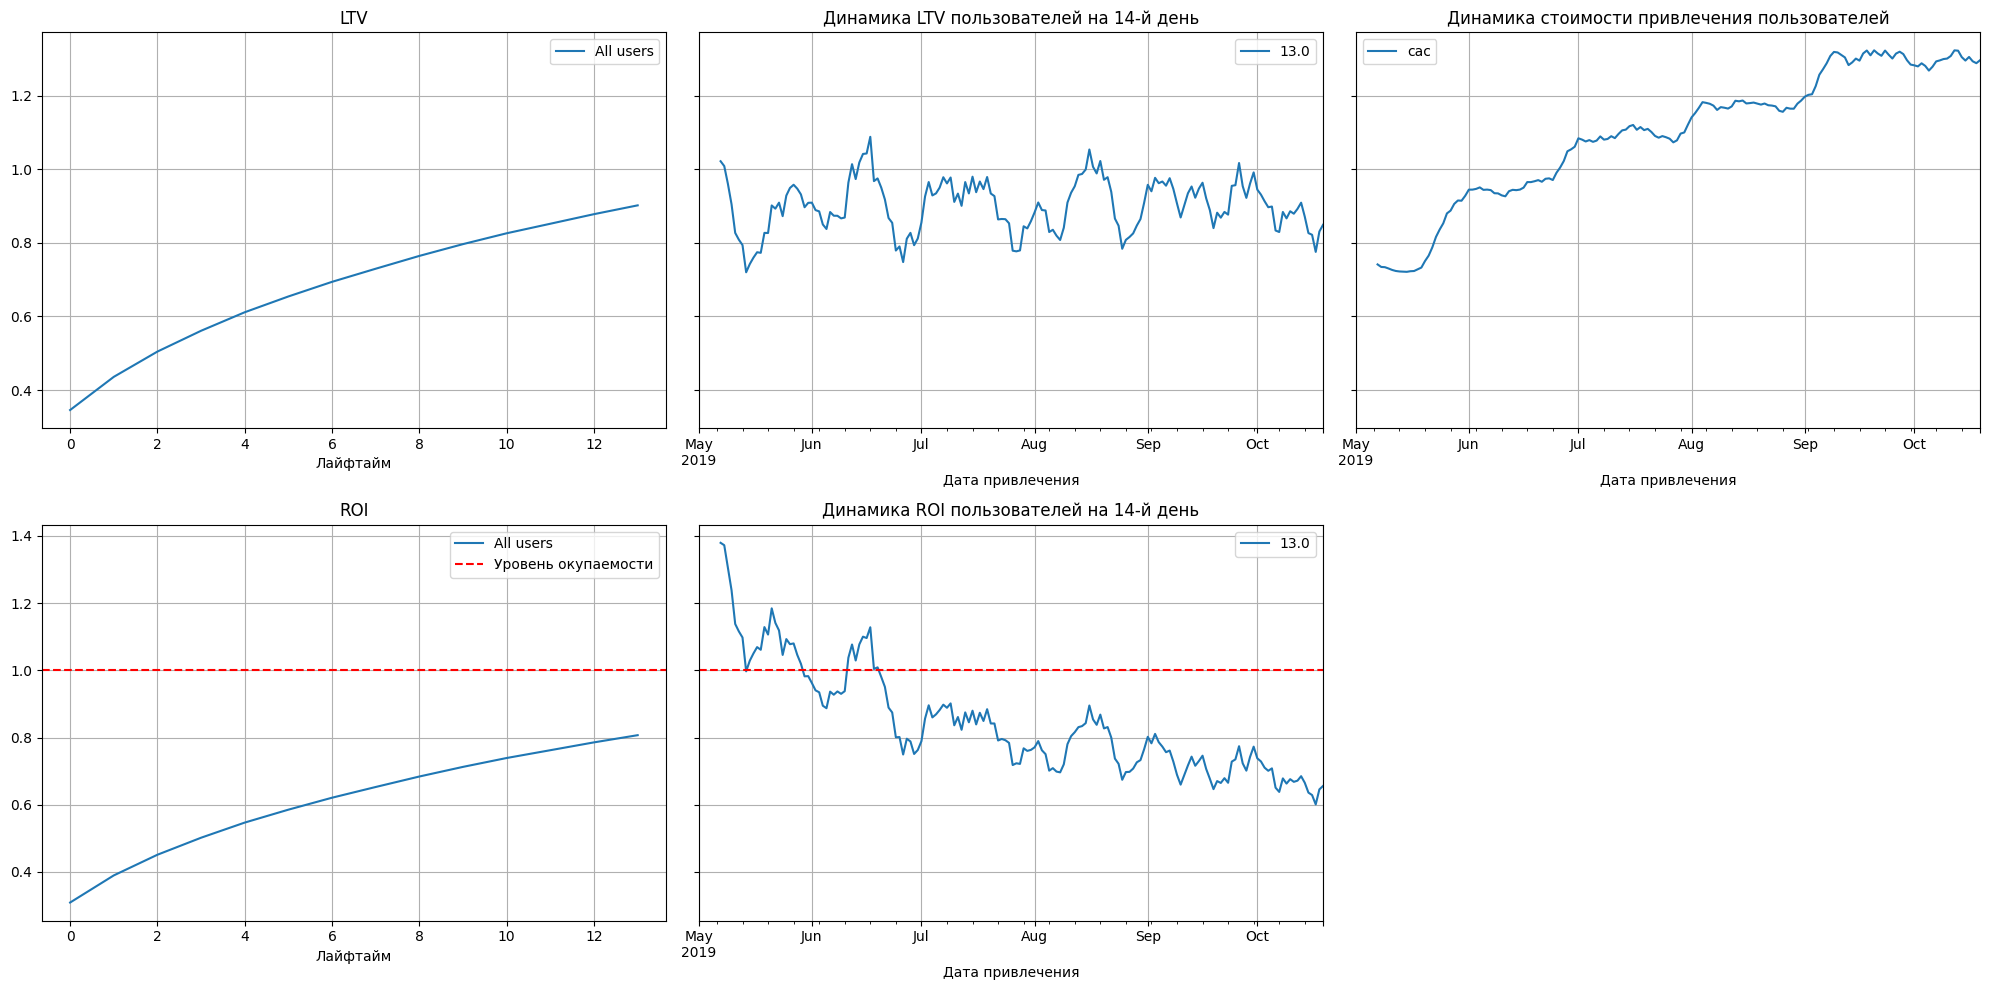

In [65]:
#Построение графиков
plot_ltv_roi(ltv, ltv_history, roi, roi_history, 14 , window=7)
plt.show()

**LTV растёт плавно от нуля. Правда, не достигает 1. На момент анализа LTV одного пользователя составляет ~0.9 денежных единиц. Динамика LTV пользователей за 2 недели циклична, и варьируется в среднем между ~0,75 и 1,1 ден.ед.**

**Стоимость привлечения пользователей показывает рост. Если на начало мая 2019г. CAC составлял ~0,75 ден.ед., то к 1 ноября 2019 года стоимость привлечения пользователей достигла отметки в ~ 1,3 ден.ед.**

**Уровень окупаемости недостигнут. Реклама показывает убыточность. Однако, следует отметить, в начале мая 2019 года ROI был около 1,4 ден.ед., к середине мая ROI впервные снизился до уровня окупаемости, а затем продолжил постепенное снижение ниже уровня окупаемости до ~0,65 ден.ед к 1 ноября 2019 года.**

### Конверсия пользователей и динамика её изменения. Удержание пользователей и динамика его изменения. Графики конверсии и удержания.

In [66]:
#Расчёт конверсии, конверсии в динамике, удержания, удержания в динамике

conv_raw, conversion, conversion_history = get_conversion(profiles, orders,  datetime(2019, 11, 1).date(), 14)

ret_raw, retention, retention_history = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14)

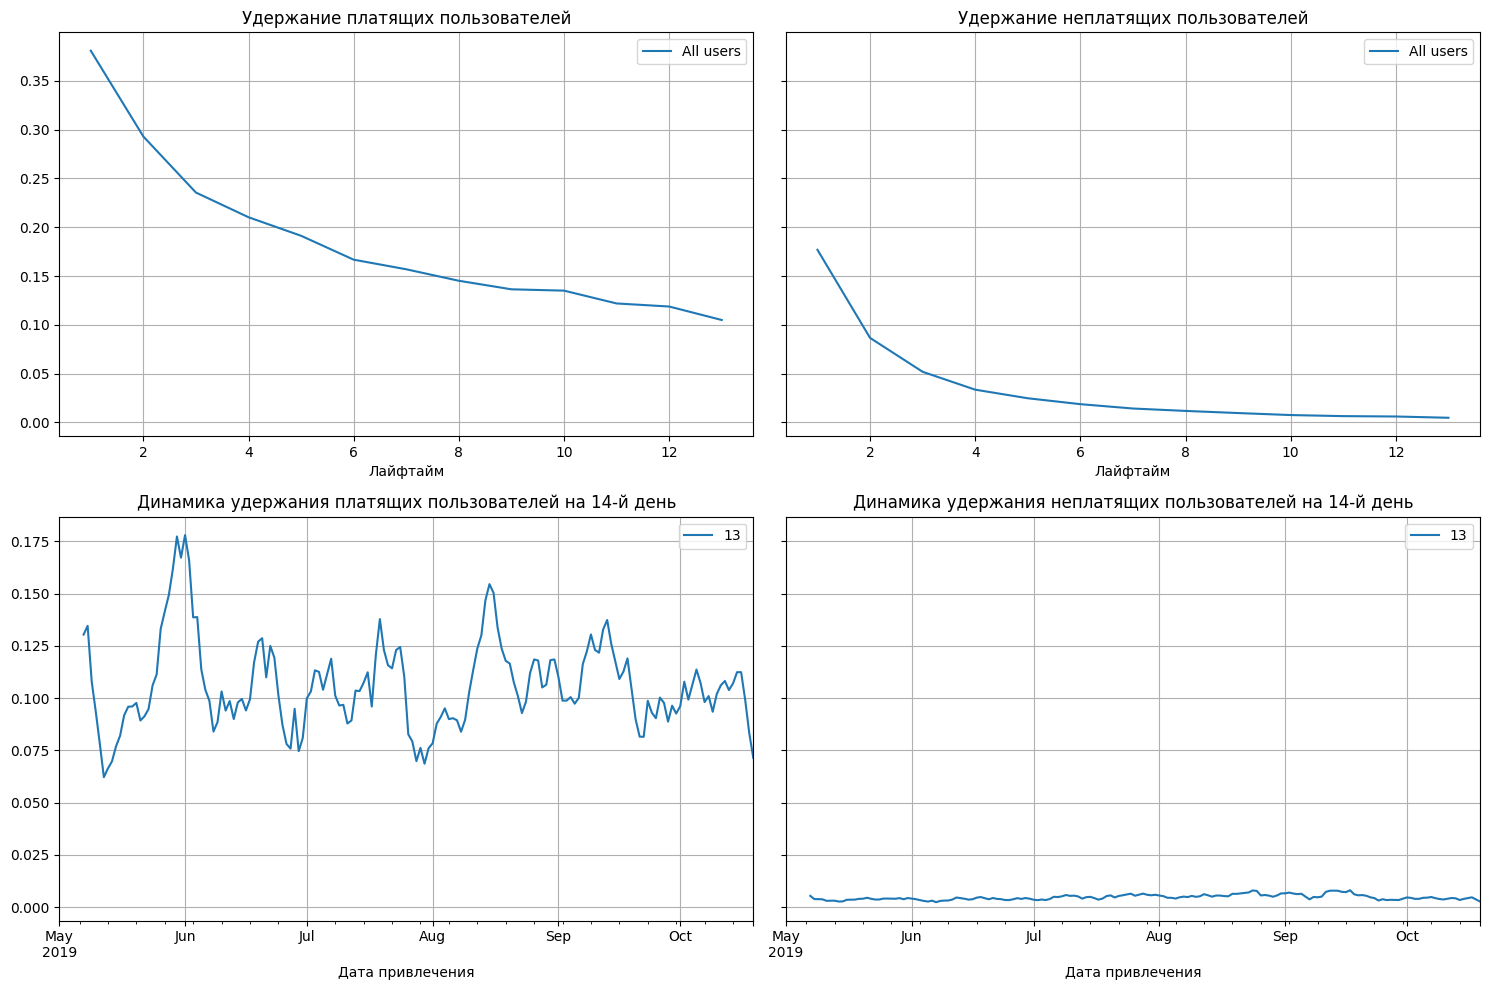

In [67]:
#Построение графиков удержания и динамики удержания
plot_retention(retention, retention_history, 14, window=7)

**Кривые удержания платящих и неплатящих пользователей построены верно, классические графики - платящие пользователи удерживаются лучше, чем неплатящие. График динамики удержания платящих пользователей цикличен.**

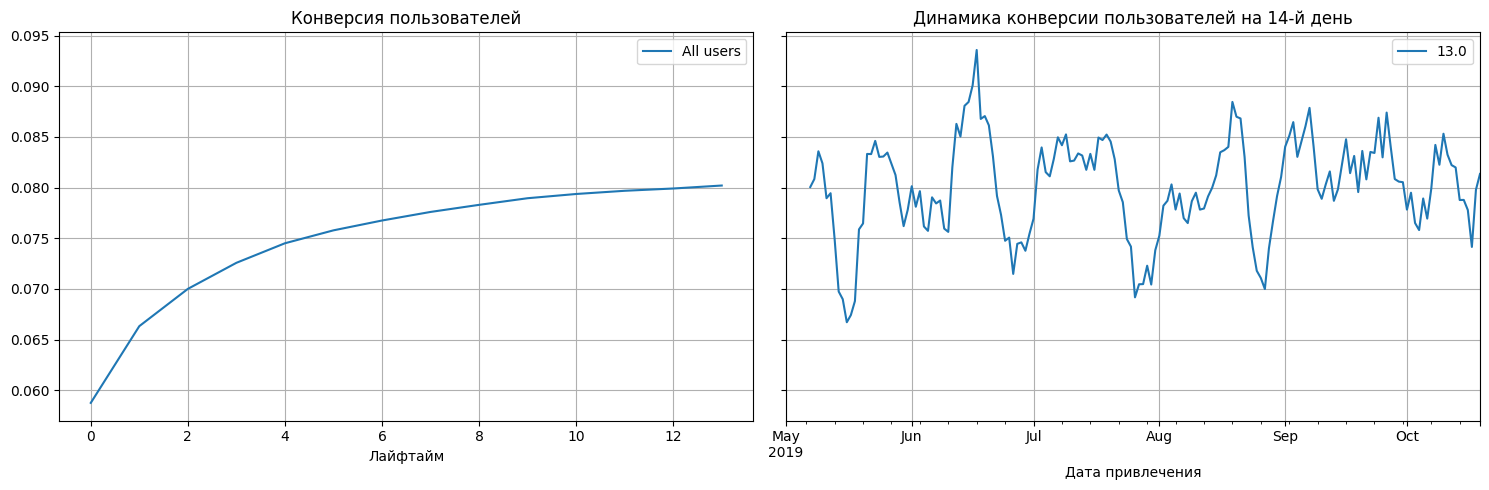

In [68]:
#Построение графиков конверсии и динамики конверсии
plot_conversion(conversion, conversion_history, 14, window=7)

**График конверсии пользователей показывает, что пользователи неплохо конвертируются. Динамика конверсии пользователей показывает цикличность.**

### Окупаемость рекламы с разбивкой по устройствам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [69]:
ltv_raw_d, ltv_d, ltv_history_d, roi_d, roi_history_d = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, \
                                                               dimensions=['device'])

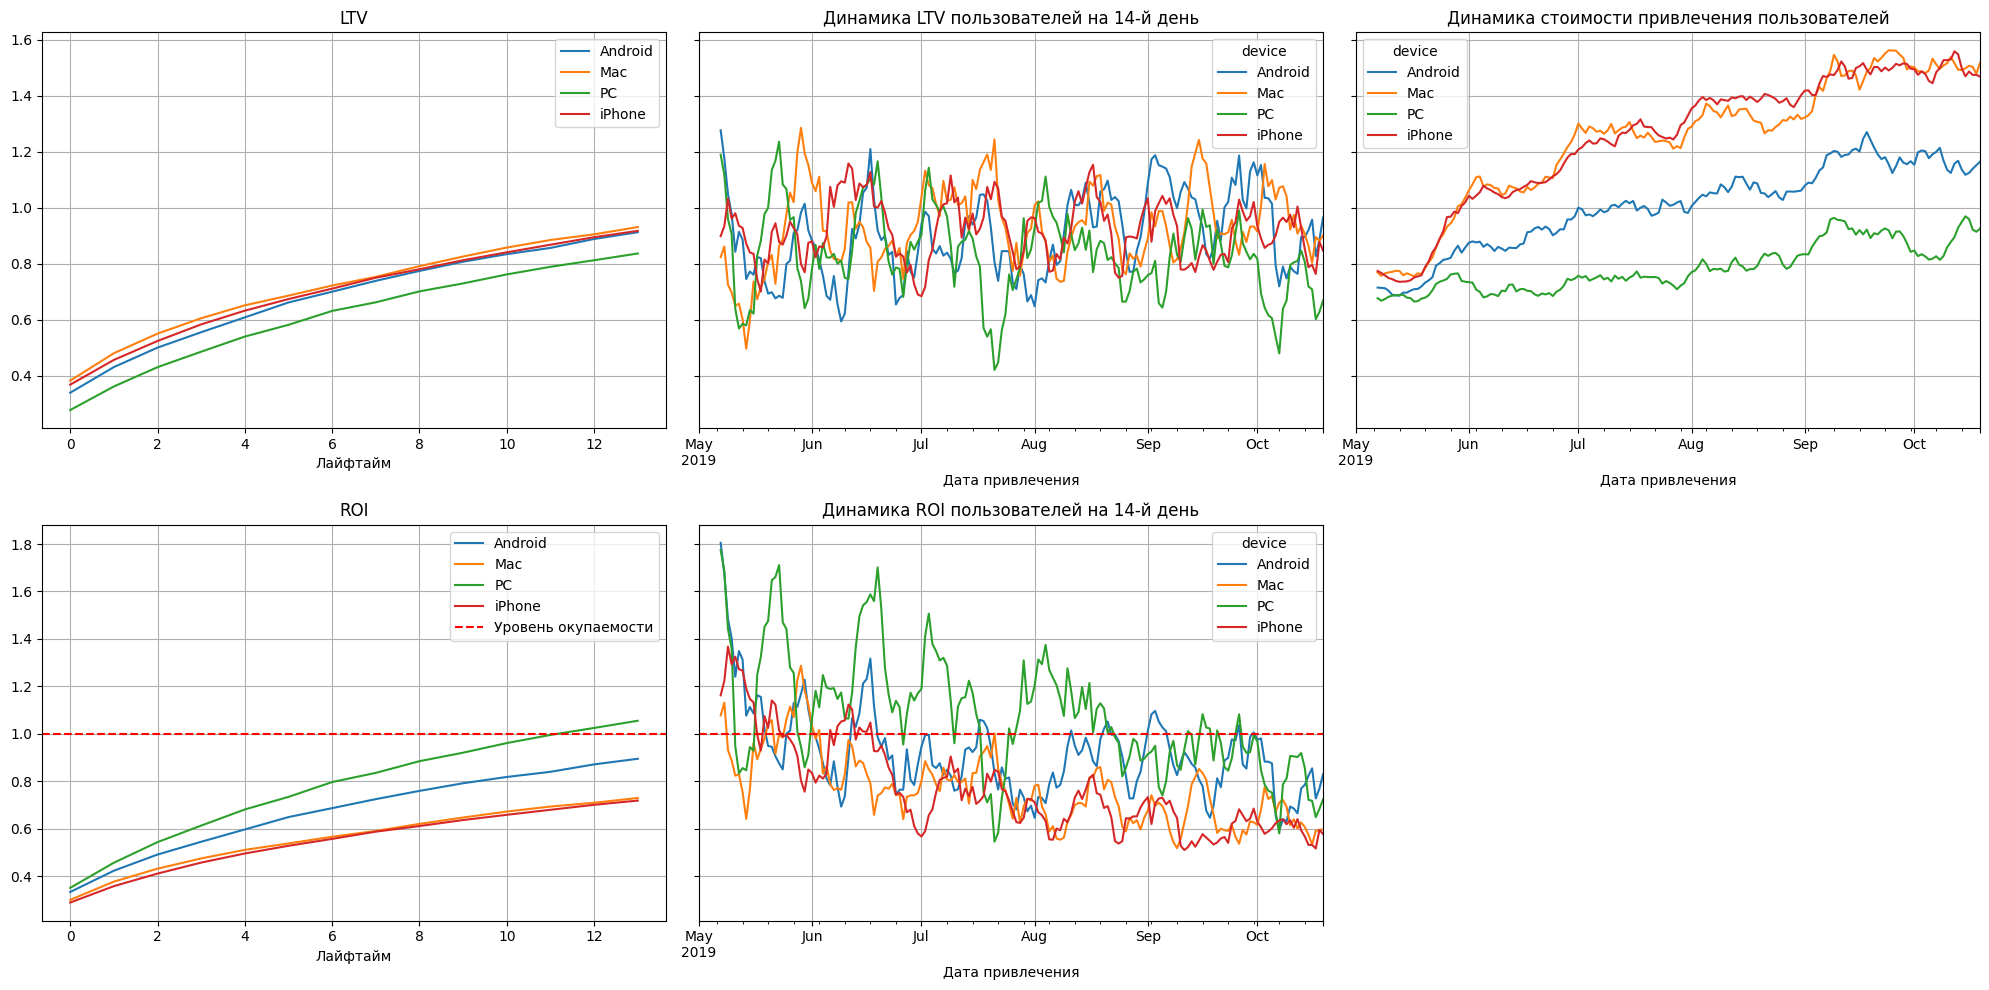

In [70]:
plot_ltv_roi(ltv_d, ltv_history_d, roi_d, roi_history_d, 14, window=7)

**Кривые на графике LTV в разрезе устройств пользователей не критически отличаются друг от друга. iPhone, Android, Mac находятся практически на одном уровне. Линия PC проходит чуть ниже. Динамика LTV пользователей на 14-й день говорит о том же. Пользователи PC приносят чуть меньше дохода. Линии остальные устройства, в целом, находятся на одном уровне на графике.**

**Динамика стоимости привлечения пользователей показывает рост по всем устройствам. Меньше всего расходы увеличились на рекламу для PC, на втором месте по увеличению расходов находятся пользователи с устройством Android. Существеннее всех выросли расходы на рекламу для пользователей с iPhone и Mac.**

**Интересен тот факт, что окупаемость показали только устройства PC. Самая худшая окупаемость у iPhone и Mac. ROI устройства Android стремится к 1, и находится на уровне ~ 0,95 ден. единиц. Динамика ROI за 2 недели говорит о том, что быстрее всех "ушли в минус" пользователи Mac, затем пользователи iPhone и Android. Хотя, Android возвращался из минуса до уровня окупаемости в середине июня, на несколько дней в середине июля, в середине августа и начале сентября, а также к концу сентября-началу октября 2019г. В то время, как iPhone с середины июня 2019 года больше не выходил на уровень окупаемости и продолжил стабильное снижение. Пользователи PC показали самую лучшую динамику ROI, хотя с сентября 2019 года также наметилась динамика к снижению ROI и ухода в минус за линию окупаемости.**

### Построение графиков удержания и конверсии в зависимости от типа устройства.

In [71]:
#Расчёт конверсии, конверсии в динамике, удержания, удержания в динамике в разрезе типов устройств.

conv_raw_d, conversion_d, conversion_history_d = get_conversion(profiles, orders,  datetime(2019, 11, 1).date(), 14,\
                                                           dimensions=['device'])

ret_raw_d, retention_d, retention_history_d = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, \
                                                           dimensions=['device'])

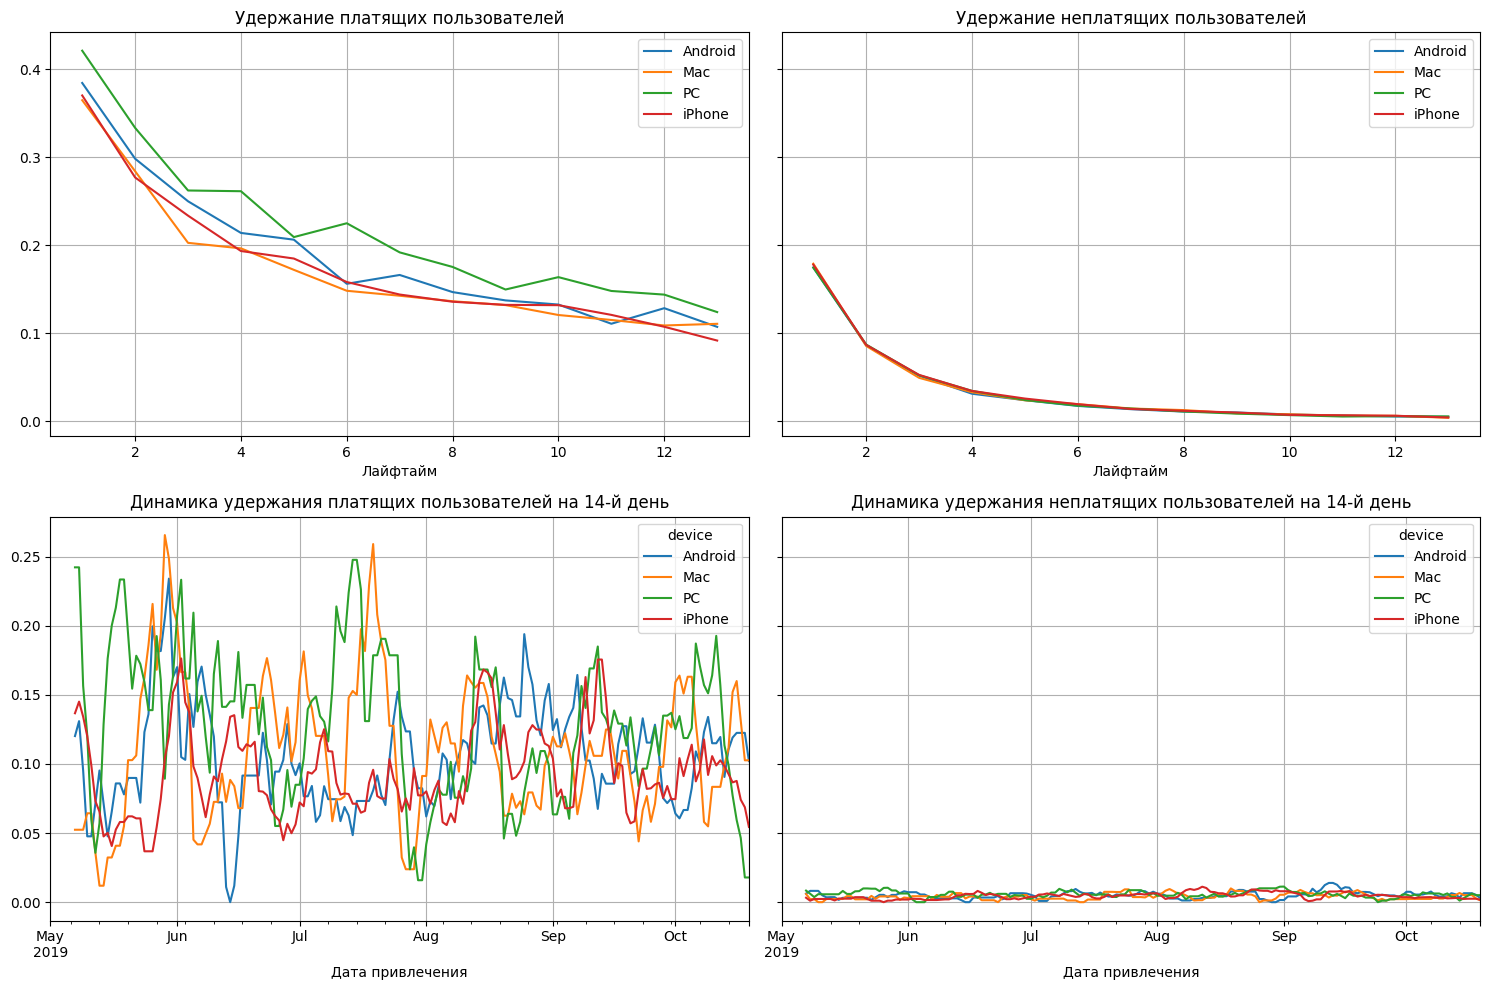

In [72]:
#Построение графиков удержания и динамики удержания в разрезе типов устройств
plot_retention(retention_d, retention_history_d, 14, window=7)

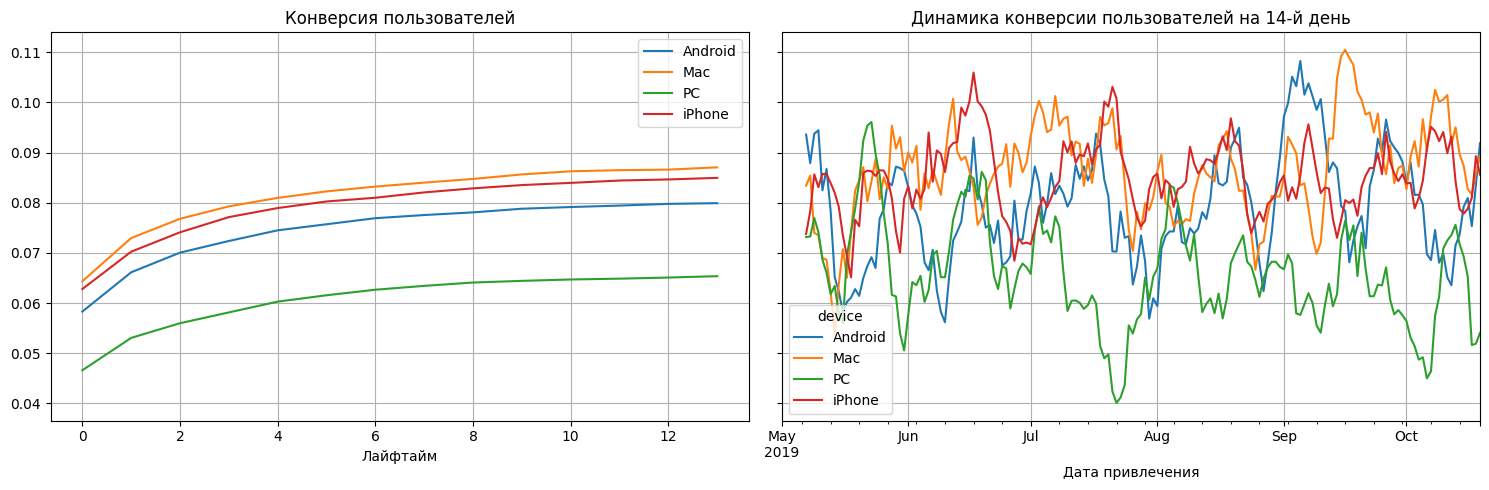

In [73]:
#Построение графиков конверсии и динамики конверсии в разрезе типов устройств
plot_conversion(conversion_d, conversion_history_d, 14, window=7)

**Построенные графики удержания и конверсии показали интересные результаты. Лучше всего удерживаются пользователи PC (хотя рассматриваемый объект- мобильное приложение и 60% платящих пользователей предпочтение отдают смартфонам). На втором месте по лучшим результат удержания находятся пользователи Android. И третье место делят между собой владельцы iPhone и Mac. В тоже самое время, владельцы Mac и iPhone показывают лучшие результаты по конверсии. На третьем месте (с небольшим отрывом) владельцы Android, и на последним месте с существенной разницей - владельцы PC.**

### Окупаемость рекламы с разбивкой по странам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [74]:
ltv_raw_r, ltv_r, ltv_history_r, roi_r, roi_history_r = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, \
                                                               dimensions=['region'])

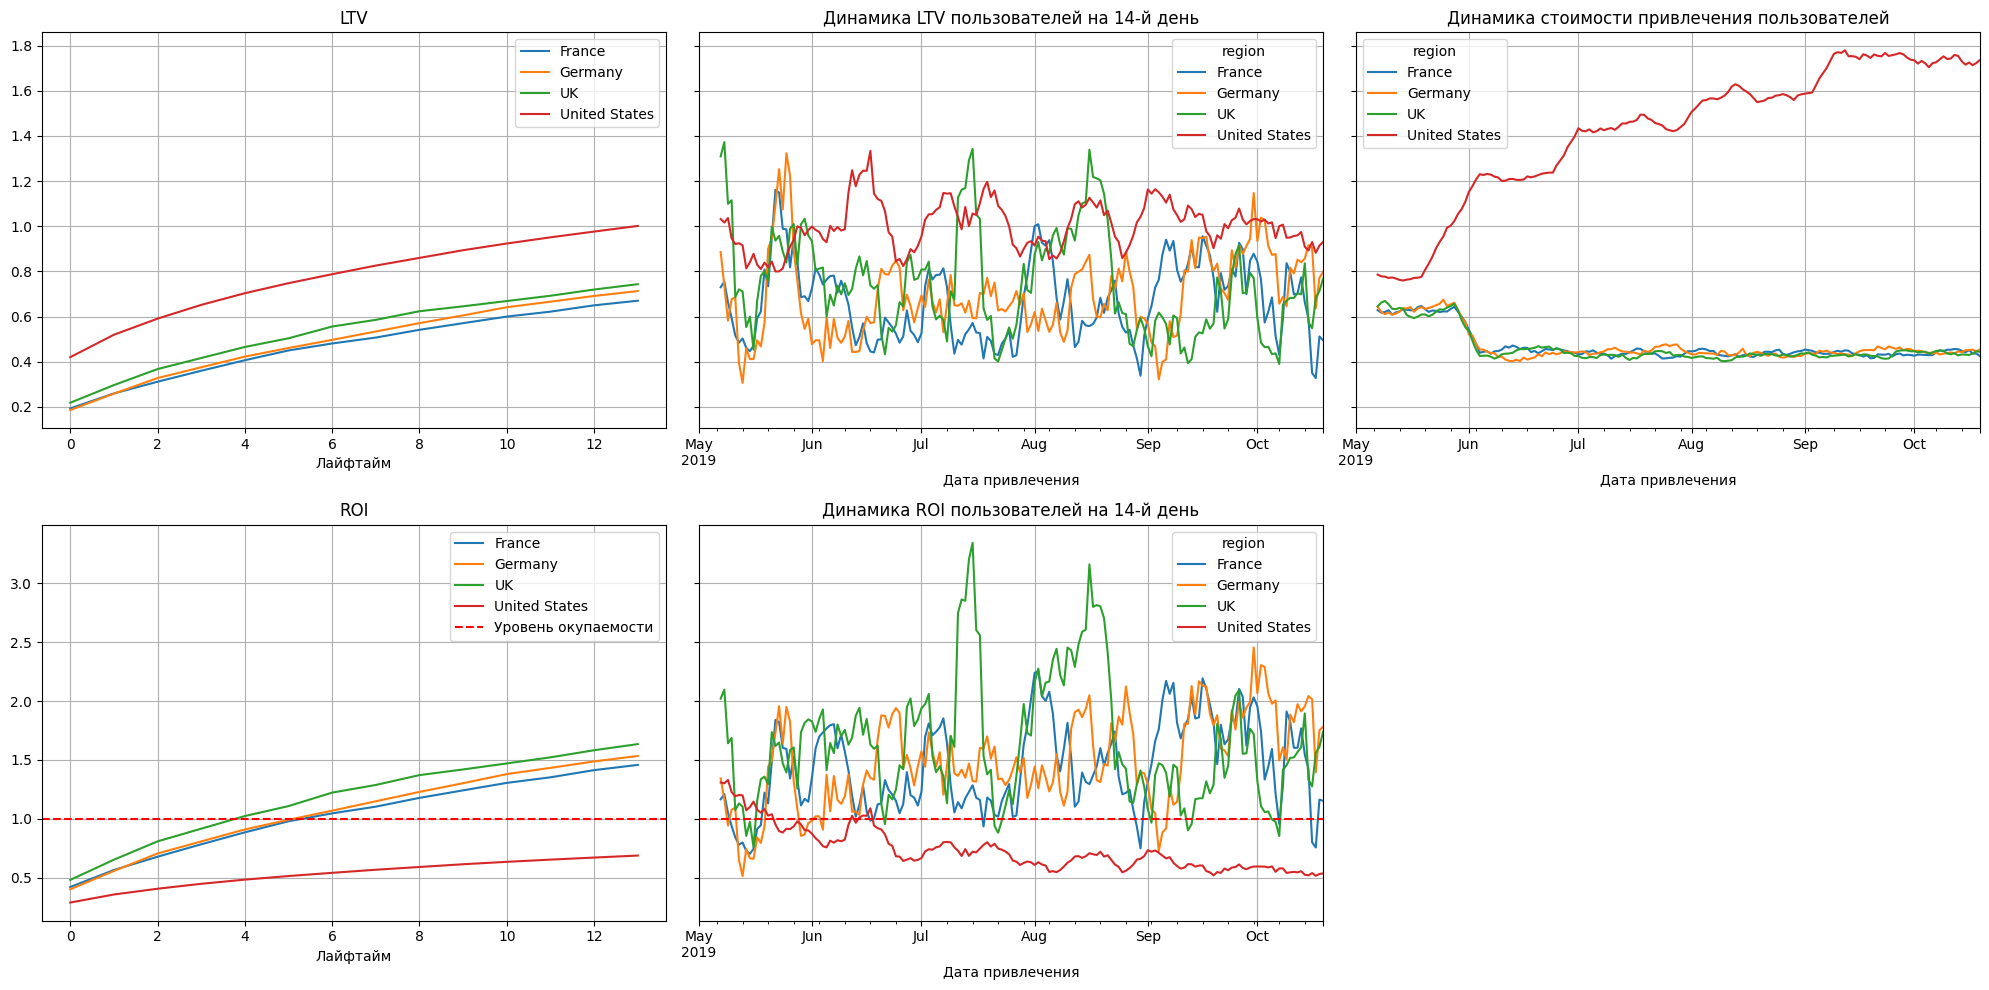

In [75]:
plot_ltv_roi(ltv_r, ltv_history_r, roi_r, roi_history_r, 14, window=7)

**Самый лучший уровень дохода на пользователя принадлежит США. У европейских стран (Германия, Франция, Великобритания) кривые LTV несколько ниже и находятся примерно на одном уровне. Динамика LTV также показывает лучшее LTV пользователей из США. Среди европейских стран чуть лучшую динамику, вероятно, показывает Великобритания.**

**Касательно динамики стоимости привлечения пользователей. Сразу заметен резкий и существенный рост расходов на пользователей из США. С 0,8 ден.ед. в мае до ~1,7 ден.ед к ноябрю 2019 года (т.е. практически в 2 раза). В тоже время, для пользователей из Европы с июня 2019 года расходы на рекламу снизились с 0,6 ден.ед. до ~0,45 ден.ед. - и находились на этом уровне вплоть до ноября 2019 года.**

**Соответственно, пользователи из стран Европы показали окупаемость ещё с 5 лайфтайма. В то время, как пользователи из США не окупились вовсе. Их уровень ROI не поднялся выше ~0,7 ден.ед. Что подтверждается динамикой ROI за 2 недели. После середины июня 2019 года показатель ROI для США стабильно ушёл в минус. Среди европейских пользователей лучшую динамику по ROI показала Великобритания.**

### Построение графиков удержания и конверсии в зависимости от стран.

In [76]:
#Расчёт конверсии, конверсии в динамике, удержания, удержания в динамике в разрезе регионов

conv_raw_r, conversion_r, conversion_history_r = get_conversion(profiles, orders,  datetime(2019, 11, 1).date(), 14,\
                                                           dimensions=['region'])

ret_raw_r, retention_r, retention_history_r = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, \
                                                           dimensions=['region'])

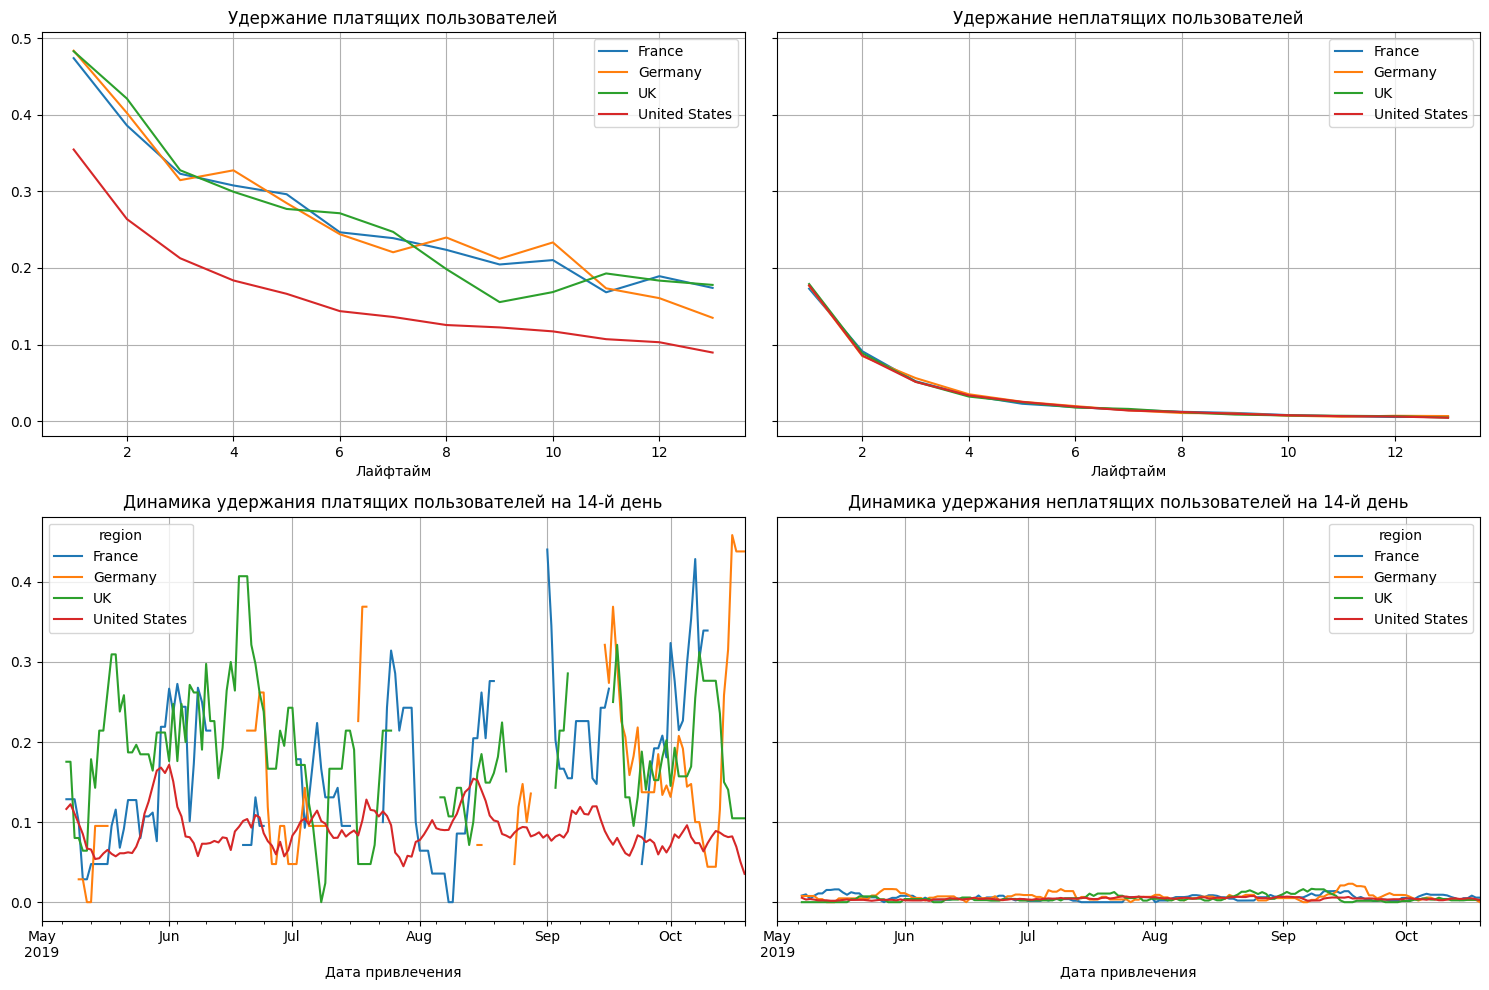

In [77]:
#Построение графиков удержания и динамики удержания в разрезе регионов
plot_retention(retention_r, retention_history_r, 14, window=7)

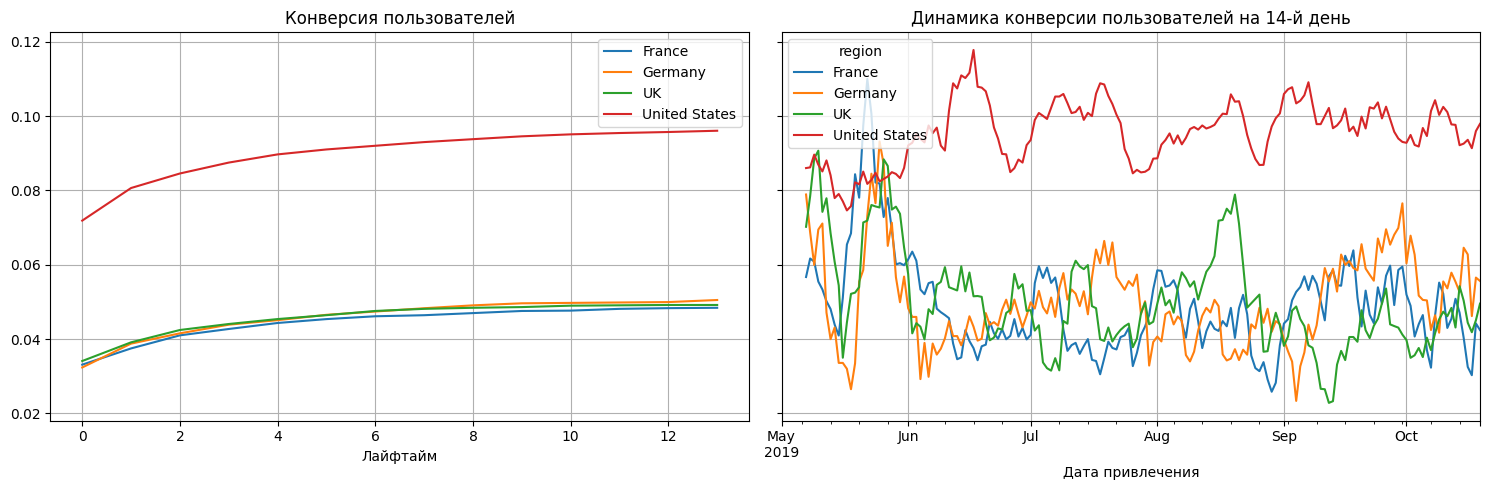

In [78]:
#Построение графиков конверсии и динамики конверсии в разрезе регионов
plot_conversion(conversion_r, conversion_history_r, 14, window=7)

**Графики удержания и конверсии в зависимости от региона также показали интересные особенности. Хуже всего удерживаются пользователи из США (однако, отставание от европейских стран не критичное). И в тоже самое время, пользователи из США конвертируются значительно лучше (в разы), чем пользователи из стран Европы.**

### Окупаемость рекламы с разбивкой по рекламным каналам. Графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [79]:
ltv_raw_c, ltv_c, ltv_history_c, roi_c, roi_history_c = get_ltv(profiles, orders, datetime(2019, 11, 1).date(), 14, \
                                                               dimensions=['channel'])

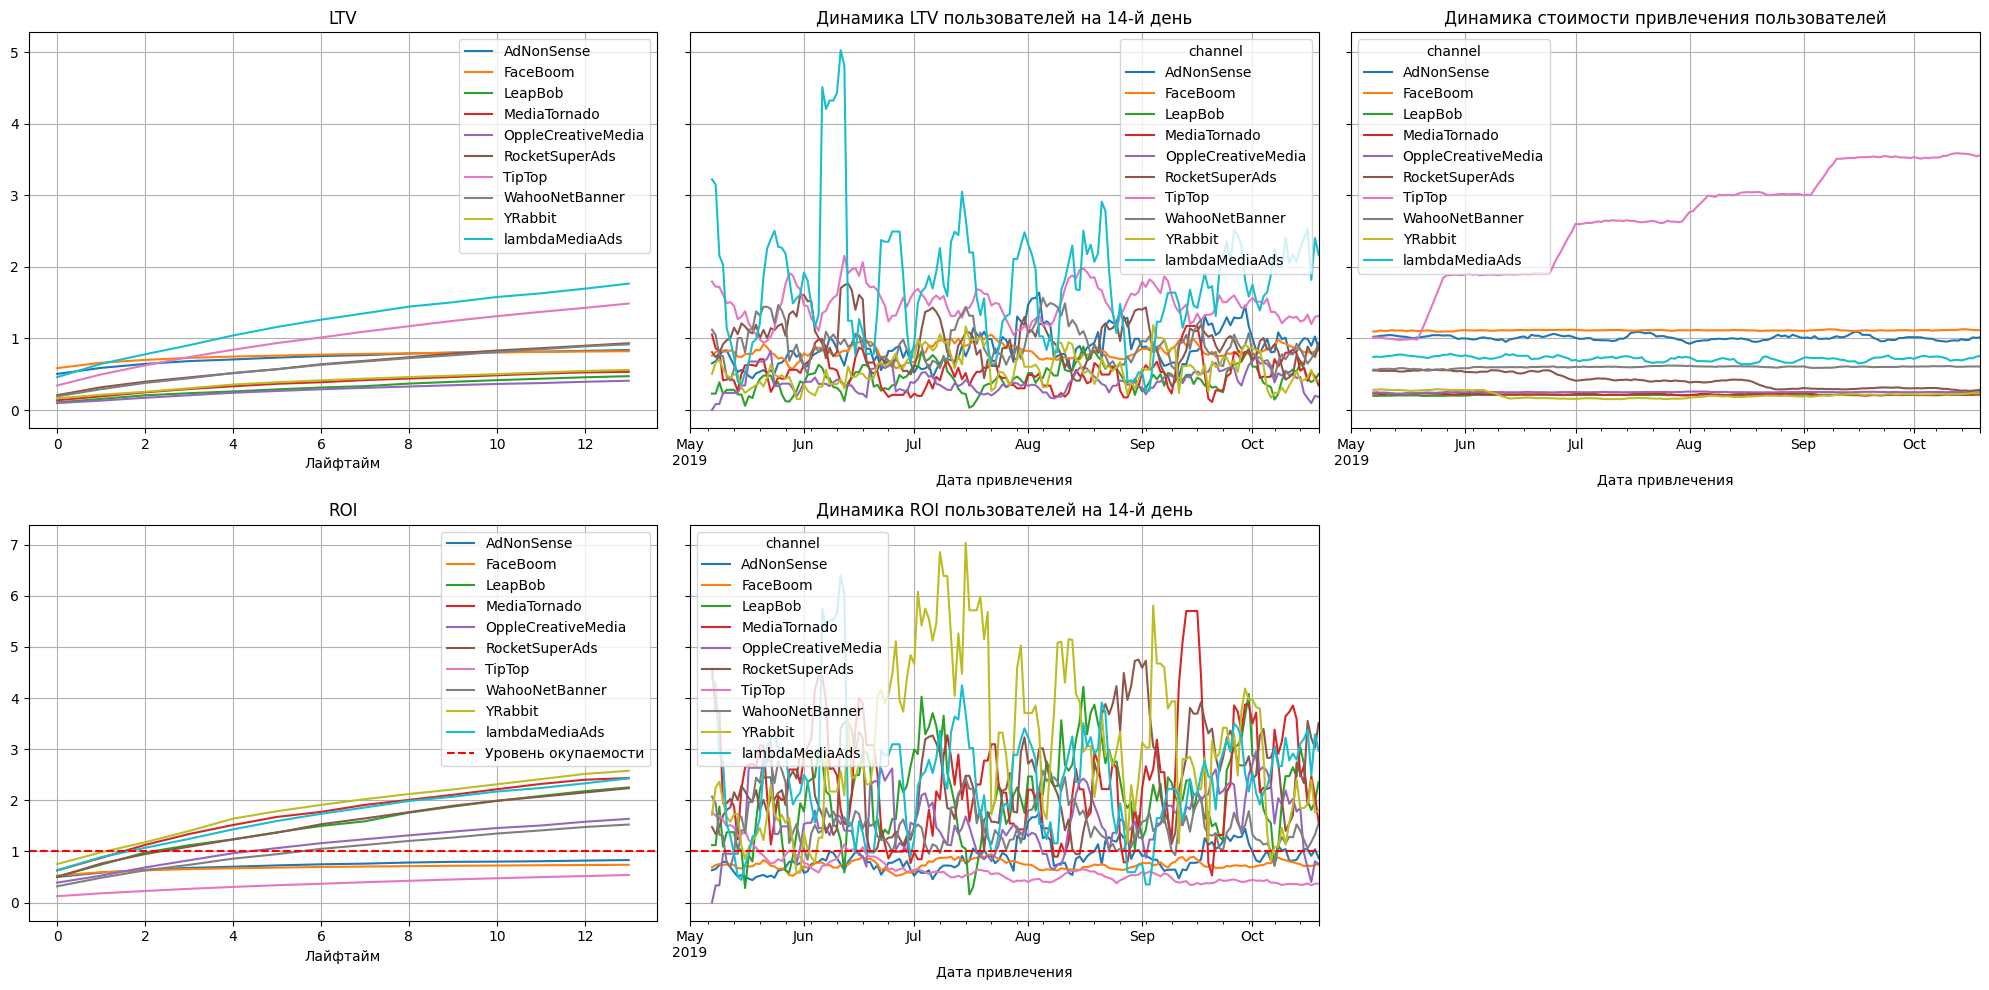

In [80]:
plot_ltv_roi(ltv_c, ltv_history_c, roi_c, roi_history_c, 14, window=7)

**Касательно LTV в разрезе рекламных источников. Лучшие значения показали lambdaMediaAds и TipTop. Затем на втором месте по показателям результатов RocketSuperAds и FaceBoom. Остальные источники примерно на одном уровне. Динамика LTV за 2 недели это подтверждает. При этом, можно дополнительно отметить, что самые низкие показатели принадлежат MediaTornado, LeapBob и OppleCreativeMedia.**
 
**Динамика стоимости привлечения пользователей показала существенный резкий рост для источника TipTop. Очевидно, что эта реклама соотносится с пользователями из США с устройствами iPhone и Mac. По остальным источникам динамика, практически отсутствует - в отношении них не было изменения маркетинговых расходов. С раходами чуть выше 1 ден.ед. на пользователя является источник Faceboom, далее практически с идентичными расходами следует AdNonSence. Далее, на уровне ~ 0,7 ден.ед. находится источник lambdaMediaAds. На уровне 0,5 ден.ед. - WahooNetBanner. И на уровне расходов ~ 0,2 ден.ед. все остальные рекламные источники.**

**Касательно окупаемости - с 3-4 лайфтаймов показали окупаемость такие источники как YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds, OppleCreativeMedia, WahooNetBanner. Не прошли порог окупаемости AdNonSense, FaceBoom, TipTop (у последнего самые худшие показатели).**

### Построение графиков удержания и конверсии в зависимости от источника.

In [81]:
#Расчёт конверсии, конверсии в динамике, удержания, удержания в динамике в разрезе регионов

conv_raw_c, conversion_c, conversion_history_c = get_conversion(profiles, orders,  datetime(2019, 11, 1).date(), 14,\
                                                           dimensions=['channel'])

ret_raw_c, retention_c, retention_history_c = get_retention(profiles, visits, datetime(2019, 11, 1).date(), 14, \
                                                           dimensions=['channel'])

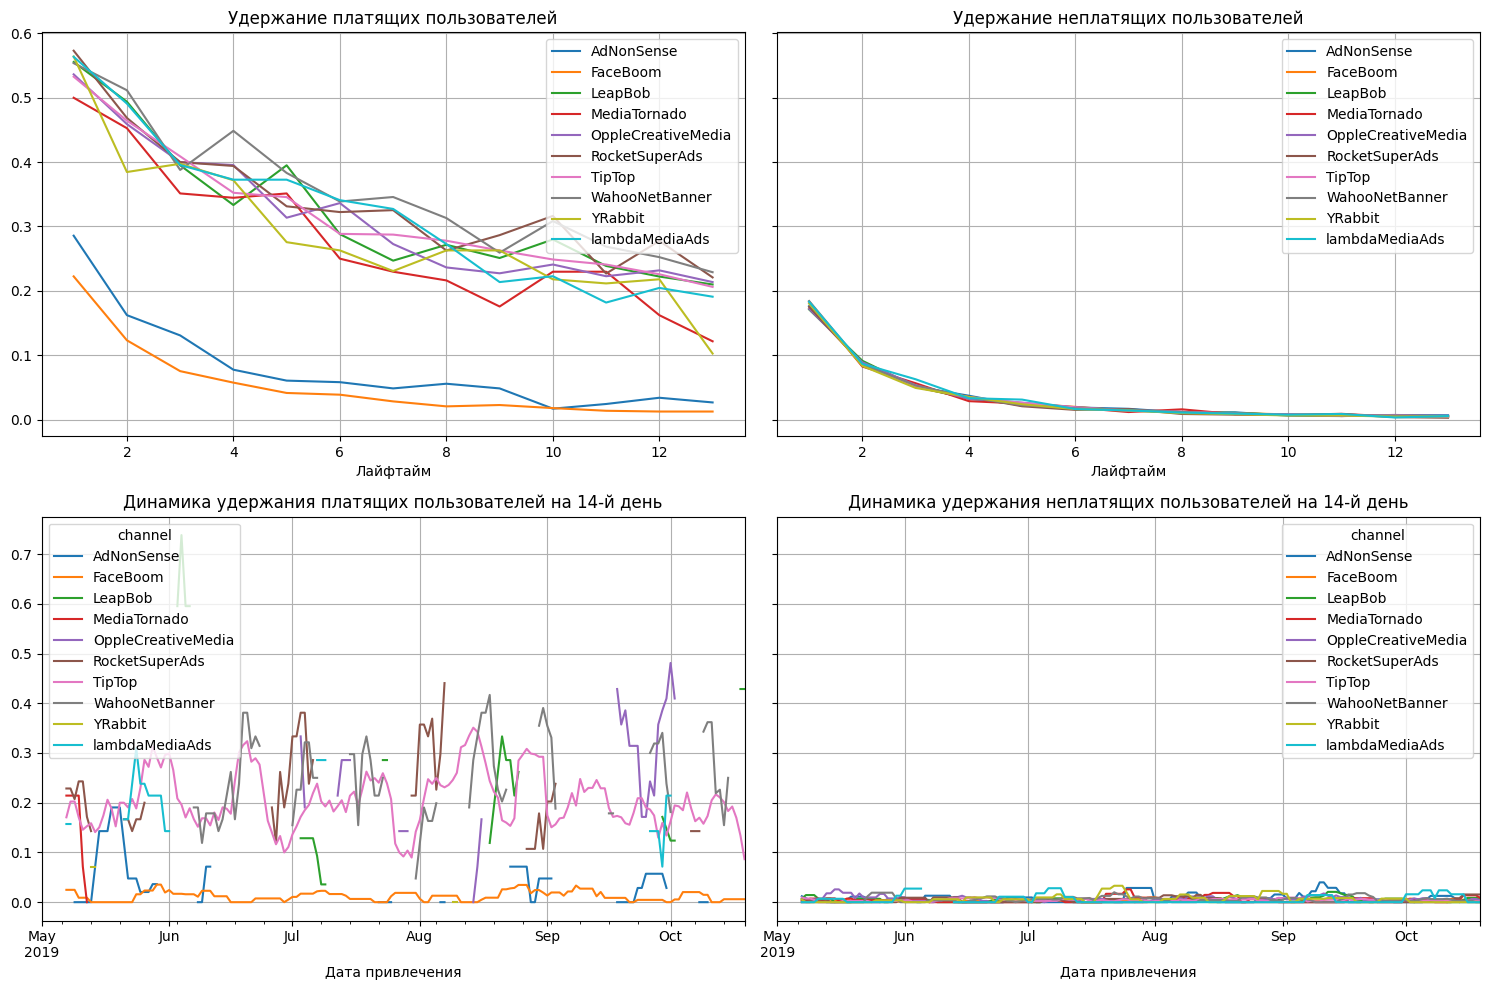

In [82]:
#Построение графиков удержания и динамики удержания в разрезе источников
plot_retention(retention_c, retention_history_c, 14, window=7)

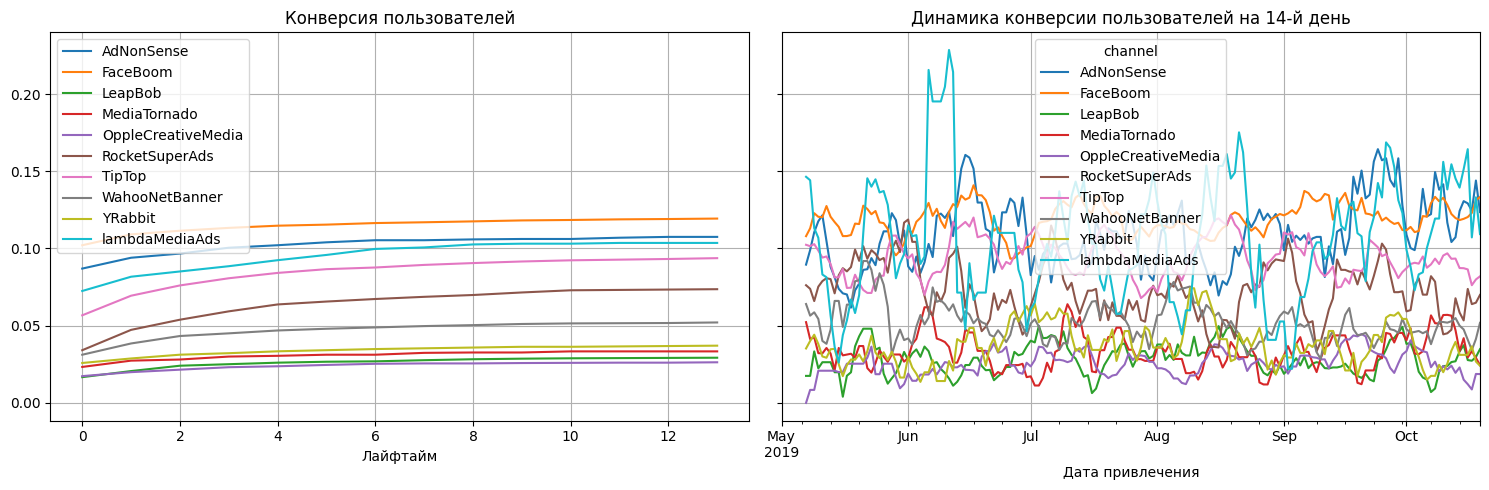

In [83]:
#Построение графиков конверсии и динамики конверсии в разрезе источников
plot_conversion(conversion_c, conversion_history_c, 14, window=7)

**При анализе маркетинговых источников первоочередное внимание уделяется, конечно, двум основным источникам - TipTop и FaceBoom, поскольку затраты на эти два источника составляют 82,6% от всего рекламного бюджета.**
    
**По удержанию платящих пользователей самые худшие результаты показали источники FaceBoom и AdNonSense. "Проблемный" источник TipTop показал хорошее удержание пользователей (на уровне с оставшимися источниками), а также и хорошую конверсию пользователей.**
    
**Лучше всего конвертируются пользователи из FaceBoom, затем на втором месте AdNonSense, далее lambdaMediaAds и на четвёртом месте TipTop.**

**Можно сделать следующие выводы:**

**1. Часть рекламы в зависимости от устройства, страны пользователя и маркетингового источника окупается, часть не окупается. В общем и целом, расходы превысили доходы. Даже с учётом окупившейся части рекламы, в совокупности был показан убыток.**

**2. Проблемы с окупаемостью маркетинговых расходов начались с июня 2019 года, что по времени совпало со значительным увеличением расходов на рекламный источник TipTop в стране США для пользователей с устройствами iPhone и Mac. Вероятно, это была одна из рекламных компаний, которая, по факту, провалилась и принесла убыток.**

**3. Возможно, провал маркетинговой компании связан с некорректным выявлением целевой аудитории при настройке рекламы в источнике TipTop. Возможно, ожидания от доходности данного рекламного источника были завышены. Возможно имеет место непредвиденные обстоятельства - усложнение функционирования источника TipTop посредством законодательного регулирования США (впроль до риска блокировки данного источника на территории страны в среднесрочной перспективе).**

4.**В ходе анализа была выявлена интересная особенность. Пользователи, имеющие лучше показатели удержания (в зависимости от факторов - регион, устройство, рекламный источник) имеют худшую конверсию. И наоборот, пользователи, которые проигрывают в удержании имеют очень хорошую конверсию (иногда отличающуюся в разы). Т.е., вероятно, имееются обратная взаимосвязь данных показателей.**

## Выводы.

**Заявленная цель исследования - анализ метрик эффективности бизнес-процессов для приложения Procrastinate Pro+, а также окупаемости рекламы для приложения. В случае выявления негативных параметров - их исследование, описание и рекомендации для улучшения сложившейся ситуации.**

**Для достижения поставленных целей в ходе работы были выполенены следующие шаги:**

**1. Загрузка и предобработка данных.**

**2. Исследовательский анализ данных - составление профилей пользователей, выявление доли платящих пользователей в разрезе стран, устройств пользователей, а также источников привлечения пользователей.**

**3. Подсчёт расходов на маркетинг - в совокупности, и для каждого рекламного источника. Построение визуализации динамики изменения расходов во времени (по неделям и месяцам) по каждому источнику. Расчёт САС по каждому источнику.**

**4. Оценка окупаемости рекламы. Анализ как совокупной окупаемости рекламы c помощью графиков LTV, ROI, графиков динамики LTV, CAC, ROI, так и анализ окупаемости рекламы с разбивкой по устройствам, странам и рекламным каналам. Анализ конверсии пользователей и динамики её изменения, удержания пользователей и динамики его изменения в совокупности и с разбивкой по факторам (страна/устройство/источник). Построение графиков.**

**5. Выводы и рекомендации.**

**В ходе изучения характеристик и предпочтений платящих пользователей выявлены следующие особенности:**

**1. Больше всего платящих пользователей приходится на США - и по количеству, и в процентном отношении. Доля платящих пользователей из региона США составляет 6,9%, что в свою очередь = 77,7% от всех платящих пользователей по всем регионам.**  

**Касательно остальных регионов - Великобритании, Франции и Германии - количество платящих пользователей в этих регионах распределено достаточно равномерно. Можно считать, что на данные 3 региона приходится 23% от всех платящих пользователей (в среднем, по 7% на каждый регион).**
   
**Меньше всего пользователей привлекается из Германии (14,9 тысяч), однако доля платящих пользователей в данном регионе в процентном отношении немного опережает Великобританию и Францию (с 17 тысячами пользователей) - и составляет 4,11% против ~3,9% соответсвенно.**
   
   
**2. Предпочения в устройствах среди платящих пользователей определяются так: основная доля (38%) приходится на владельцев iPhone, на втором месте (23%) владельцы Android, далее с 21,5% владельцы Mac, и на последнем месте с 17,3% - устройства PC.**


**3. В ходе анализа рекламных источников был выделен ТОП-5 источников по эффективности привлечения платящих пользователей:**

- ***FaceBoom (12,2% пользователей из данного источника конвертируются в платящих),***
- ***AdNonSense (11,3% пользователей из данного источника конвертируются в платящих),***
- ***lambdaMediaAds	(10,4% конвертируемых пользователей),***
- ***TipTop (9.6%),***
- ***RocketSuperAds с 7,91%.*** 
- *у остальных источников доля конвертируемых пользователей в платящих составляет 5% и менее.*

**Однако, источники привлечения пользователей различаются по популярности среди пользователей. И некоторые источники, показавшие свою эффективность по проценту конвертируемых пользователей в платящих, уступают более массовым источникам привлечения с меньшим процентом успешной конвертации пользователей. Так, первое место в общей доле всех платящих пользователей приходится на**

- ***FaceBoom (40%),***
- ***второе место - TipTop (21%),***
- ***третье место - "бесплатные" органические пользователи с 13%.***

**Итого, ТОП-3 источников занимают 74% в доле ВСЕХ платящих пользователей. На все остальные источники приходятся доли по 5% и менее.**

**Таким образом, "типичный профиль" платящего пользователя можно описать как житель США с устройством iPhone, узнавший о приложении через рекламный источник FaceBoom.**

**В ходе анализа маркетинговых данных выявлено следующее:**

**1. Общие расходы на маркетинг составили 105497 денежных единиц, из которых самые существенные расходы приходятся на источник:**

- ***TipTop - 54,7 тыс.ден.единиц.,***
- ***FaceBoom с расходами 32,4 тыс.ден.единиц.,***
- ***на все остальные 8 источников привлечения пользователей было потрачено 18,3 тыс.ден.единиц (по 5 тыс.ден.единиц и менее на каждый источник).***


**2. Средняя стоимость привлечения одного пользователя для всех источников (ЗА ИСКЛЮЧЕНИЕМ TipTop) варьируется от 0,25 до 1,1 ден.ед.**
    
**На минимальной границе со стоимостью ~0,25 ден.ед. находятся такие источники, как YRabbit, OppleCreativeMedia	, MediaTornado, LeapBob.**
    
**На верхней границе стоимости в ~1,1 ден.ед. находятся такие источники, как FaceBoom и AdNonSense.**
    
***(Расчёт CAC исключает бесплатных/органических пользователей.)***
    
**Следует отметить выявленные в ходе анализа аномальные значения CAC для источника TipTop.**
    
**Изначально, стоимость привлечения одного пользователя в TipTop составляла ~1 ден.единицу, однако, с середины мая 2019г. стоимость резко увеличилась до ~1.8 денежных единиц. Похожие резкие скачки увеличения CAC наблюдались в конце июня и в начале сентября 2019г. В итоге, на конец октября 2019г. средняя стоимость привлечения одного пользователя в TipTop составила 3,5 ден.единицы, что превышает расходы по другим источникам более, чем в 3 раза.**

**Анализ окупаемости рекламы выявил следующие критические явления:**

**1. Уровень совокупной окупаемости недостигнут. Реклама показывает убыточность. При этом следует отметить, что в начале мая 2019 года реклама окупалась и ROI был около 1,4 ден.ед., а к середине мая ROI впервные снизился до уровня окупаемости, и затем продолжил постепенное снижение ниже уровня окупаемости до ~0,65 ден.ед к 1 ноября 2019 года.**

**На этом неблагоприятном фоне стоимость привлечения пользователей, наоборот, показала рост. Если на начало мая 2019г. CAC составлял ~0,75 ден.ед., то к 1 ноября 2019 года стоимость привлечения пользователей достигла отметки в ~ 1,3 ден.ед.**
   
   
**2. Был проведён более детальный анализ показателя окупаемости в зависимости от устройства и страны пользователя, а также рекламного иточника, в ходе которого выявлены факты, описанные ниже.**


***3. Окупаемость в разрезе устройств пользователей.***

**Интересен тот факт, что окупаемость показали только устройства PC. Хотя продуктом является мобильное приложение, и целевая аудитория - владельны смартфонов (что также подтверждается предпочтениями платящих пользователей в устройствах). Самая худшая окупаемость у iPhone и Mac (хотя по предпочтениям платящих пользователей iPhone занимает первое место). ROI устройства Android стремится к 1, и находится на уровне ~ 0,95 ден. единиц.**

**Динамика ROI за 2 недели говорит о том, что быстрее всех "ушли в минус" пользователи Mac, затем пользователи iPhone и Android. Хотя, Android возвращался из минуса до уровня окупаемости в середине июня, на несколько дней в середине июля, в середине августа и начале сентября, а также к концу сентября-началу октября 2019г. В то время, как iPhone с середины июня 2019 года больше не выходил на уровень окупаемости и продолжил стабильное снижение. Пользователи PC показали самую лучшую динамику ROI, хотя с сентября 2019 года также наметилась динамика к снижению ROI и ухода в минус за линию окупаемости.**

**На этом фоне динамика стоимости привлечения пользователей показывает рост по всем устройствам. Меньше всего расходы увеличились на рекламу для PC, на втором месте по увеличению расходов находятся пользователи с устройством Android. Существеннее всех выросли расходы на рекламу для пользователей с iPhone и Mac.**

***4. Окупаемость в разрезе стран.***

**Самый лучший уровень LTV на пользователя принадлежит США. У европейских стран (Германия, Франция, Великобритания) кривые LTV несколько ниже и находятся примерно на одном уровне. Среди европейских стран чуть лучшую динамику по LTV, вероятно, показывает Великобритания.**

**При этом, если пользователи из стран Европы показали окупаемость ещё с 5 лайфтайма, то пользователи из США не окупились вовсе. Их уровень ROI не поднялся выше ~0,7 ден.ед. Что подтверждается динамикой ROI за 2 недели. После середины июня 2019 года показатель ROI для США стабильно ушёл в минус. Среди европейских пользователей лучшую динамику по ROI показала Великобритания.**

**Касательно динамики стоимости привлечения пользователей. Выделяется резкий и существенный рост расходов на пользователей из США. С 0,8 ден.ед. в мае до ~1,7 ден.ед к ноябрю 2019 года (т.е. практически в 2 раза). В тоже время, для пользователей из Европы с июня 2019 года расходы на рекламу снизились с 0,6 ден.ед. до ~0,45 ден.ед. - и находились на этом уровне вплоть до ноября 2019 года.**

***5. Окупаемость в разрезе рекламных источников.***

**Касательно LTV в разрезе рекламных источников. Лучшие значения показали lambdaMediaAds и TipTop. Затем, на втором месте по показателям уровня LTV RocketSuperAds и FaceBoom. Остальные источники примерно на одном уровне.**
 
**Динамика стоимости привлечения пользователей показала существенный резкий рост для источника TipTop. Очевидно, что эта реклама соотносится с пользователями из США с устройствами iPhone и Mac. По остальным источникам динамика практически отсутствует - в отношении них не было изменения маркетинговых расходов. С раходами чуть выше 1 ден.ед. на пользователя является источник Faceboom, далее практически с идентичными расходами следует AdNonSence. Далее, на уровне ~ 0,7 ден.ед. находится источник lambdaMediaAds. На уровне 0,5 ден.ед. - WahooNetBanner. И на уровне расходов ~ 0,2 ден.ед. все остальные рекламные источники.**

**При этом по окупаемости не утешительные расчёты - с 3-4 лайфтаймов показали окупаемость самые мелкие источники, такие как YRabbit, MediaTornado, lambdaMediaAds, LeapBob, RocketSuperAds, OppleCreativeMedia, WahooNetBanner. Не прошли порог окупаемости AdNonSense, FaceBoom, TipTop (у последнего самые худшие показатели).**

**Можно сделать следующие выводы:**

**1. Часть рекламы в зависимости от устройства, страны пользователя и маркетингового источника окупается, часть не окупается. В общем и целом, расходы превысили доходы. Даже с учётом окупившейся части рекламы, в совокупности был показан убыток.**

**2. Проблемы с окупаемостью маркетинговых расходов начались с июня 2019 года, что по времени совпало со значительным увеличением расходов на рекламный источник TipTop в стране США для пользователей с устройствами iPhone и Mac. Вероятно, это была одна из рекламных компаний, которая, по факту, провалилась и принесла убыток.**

**3. Возможно, провал маркетинговой компании связан с некорректным выявлением целевой аудитории при настройке рекламы в источнике TipTop. Возможно, ожидания от доходности данного рекламного источника были завышены. Возможно имеет место непредвиденные обстоятельства - усложнение функционирования источника TipTop посредством законодательного регулирования США (впроль до риска блокировки данного источника на территории страны в среднесрочной перспективе).**

**4. Выявлена необычная особенность для мобильного приложения. А именно тот факт, что окупаемость в разрезе устройств показали только PC. Хотя продуктом является мобильное приложение, и целевая аудитория - владельны смартфонов (что также подтверждается предпочтениями платящих пользователей в устройствах). Самая худшая окупаемость у iPhone и Mac (хотя по предпочтениям платящих пользователей iPhone занимает первое место).**

**5. Окупаемость показали самые мелкие и не самые популярные источники. В то время, как такие гиганты как FaceBoom и TipTop с долями в разрезе платных пользователей 40% и 21% соответственно, не окупились вовсе.**

***Из всего этого можно сделать вывод од ошибках в планировании маркетинговой компании.***


**РЕКОМЕНДАЦИИ для отдела маркетинга:**  

**1. Скорейшее сокращение расходов на рекламу в источнике TipTop до уровня начала мая 2019 года - т.е. снизить CAC до 1 ден.ед. (расходы аналогичные FaceBoom и AdNonSense).**


**2. Проверить настройки таргетинга. В частности, целевая аудитория - владельцы смартфонов, а не персональных компьютеров. Кроме того, имеет смысл проверить стабильность функционирования приложения в мобильных устройствах.**


**3. После проведения данных шагов через месяц повторить оценку по исследованию бизнес-процессов с целью оценить эффективность от проведённых мероприятий.**


**4. В качестве предложений и идей для обсуждения: возможно, некоторую часть высвободившихся средств следует в качестве эксперимента по изменению маркетинговой стратегии направить на плавное увеличение расходов на рекламу в FaceBoom. Этот источник является самым популярным среди платных пользователей. Кроме того, LTV по данному источнику стремится к 1. Возможно, некоторое увеличение рекламной компании для этого источника позволит если не окупить затраты на рекламу, то хотя бы "выйти в 0".**


**4. Параллельно с этим, предлагается рассмотреть вопрос о том, следует ли продолжать ориентироваться на рынок США, либо попытаться увеличить доли пользователей в европейских странах, т.е. диверсифицировать продукт по страновому признаку. Следует отметить, что маркетинговые затраты в Великобритании, Франции и Германии окупились. Также следует добавить, что по некоторым характеристикам Великобритания имела чуть более выгодное положение, чем Германия и Франция.**



